In [80]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
%autoreload all

In [82]:
import os

import duckdb
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns
from duckdb import DuckDBPyRelation

from utils.model_evaluation.overall_performance import *
from utils.model_evaluation.client_benefit import *

sns.set(font_scale=1.2)
sns.set_style('white')

In [83]:
BASE_DIR = "/home/lukas/Work/Masterthesis/masterthesis-data/"
OUTPUT_DIR = "/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/output/plots/"

In [84]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [85]:
def connect_to_run(run_id: str) -> duckdb.DuckDBPyConnection:
    full_path = os.path.join(BASE_DIR, run_id + ".db")
    if not os.path.exists(full_path):
        raise Exception(f"No database found for run {run_id} at path {full_path}")
    return duckdb.connect(str(full_path))

In [86]:
SQL_FULL = """
SELECT *
FROM configurations
NATURAL JOIN metrics
NATURAL JOIN data_distributions
NATURAL JOIN infos
"""

def get_run_relation(conn: duckdb.DuckDBPyConnection) -> duckdb.DuckDBPyRelation:
    return conn.sql(SQL_FULL)

# Runs

Each run/imbalance combination is in a different db file:

In [87]:
BENEFIT_QUANTITY_CIFAR = "20240523_095552"
BENEFIT_LABEL_DISTRIBUTION_CIFAR = "20240508_164642"
BENEFIT_FEATURE_DISTRIBUTION_CIFAR = "20240521_112838"
BENEFIT_QUANTITY_MNIST = "20240525_142650"
BENEFIT_LABEL_DISTRIBUTION_MNIST = "20240515_143650"
BENEFIT_FEATURE_DISTRIBUTION_MNIST = "20240522_092910"

CONTRIBUTION_FEATURE_DISTRIBUTION_CIFAR = "20240605_085750"
CONTRIBUTION_FEATURE_DISTRIBUTION_MNIST = "20240607_110246"

# Overall Model Training

## Quantity Imbalance

### CIFAR-10

In [88]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

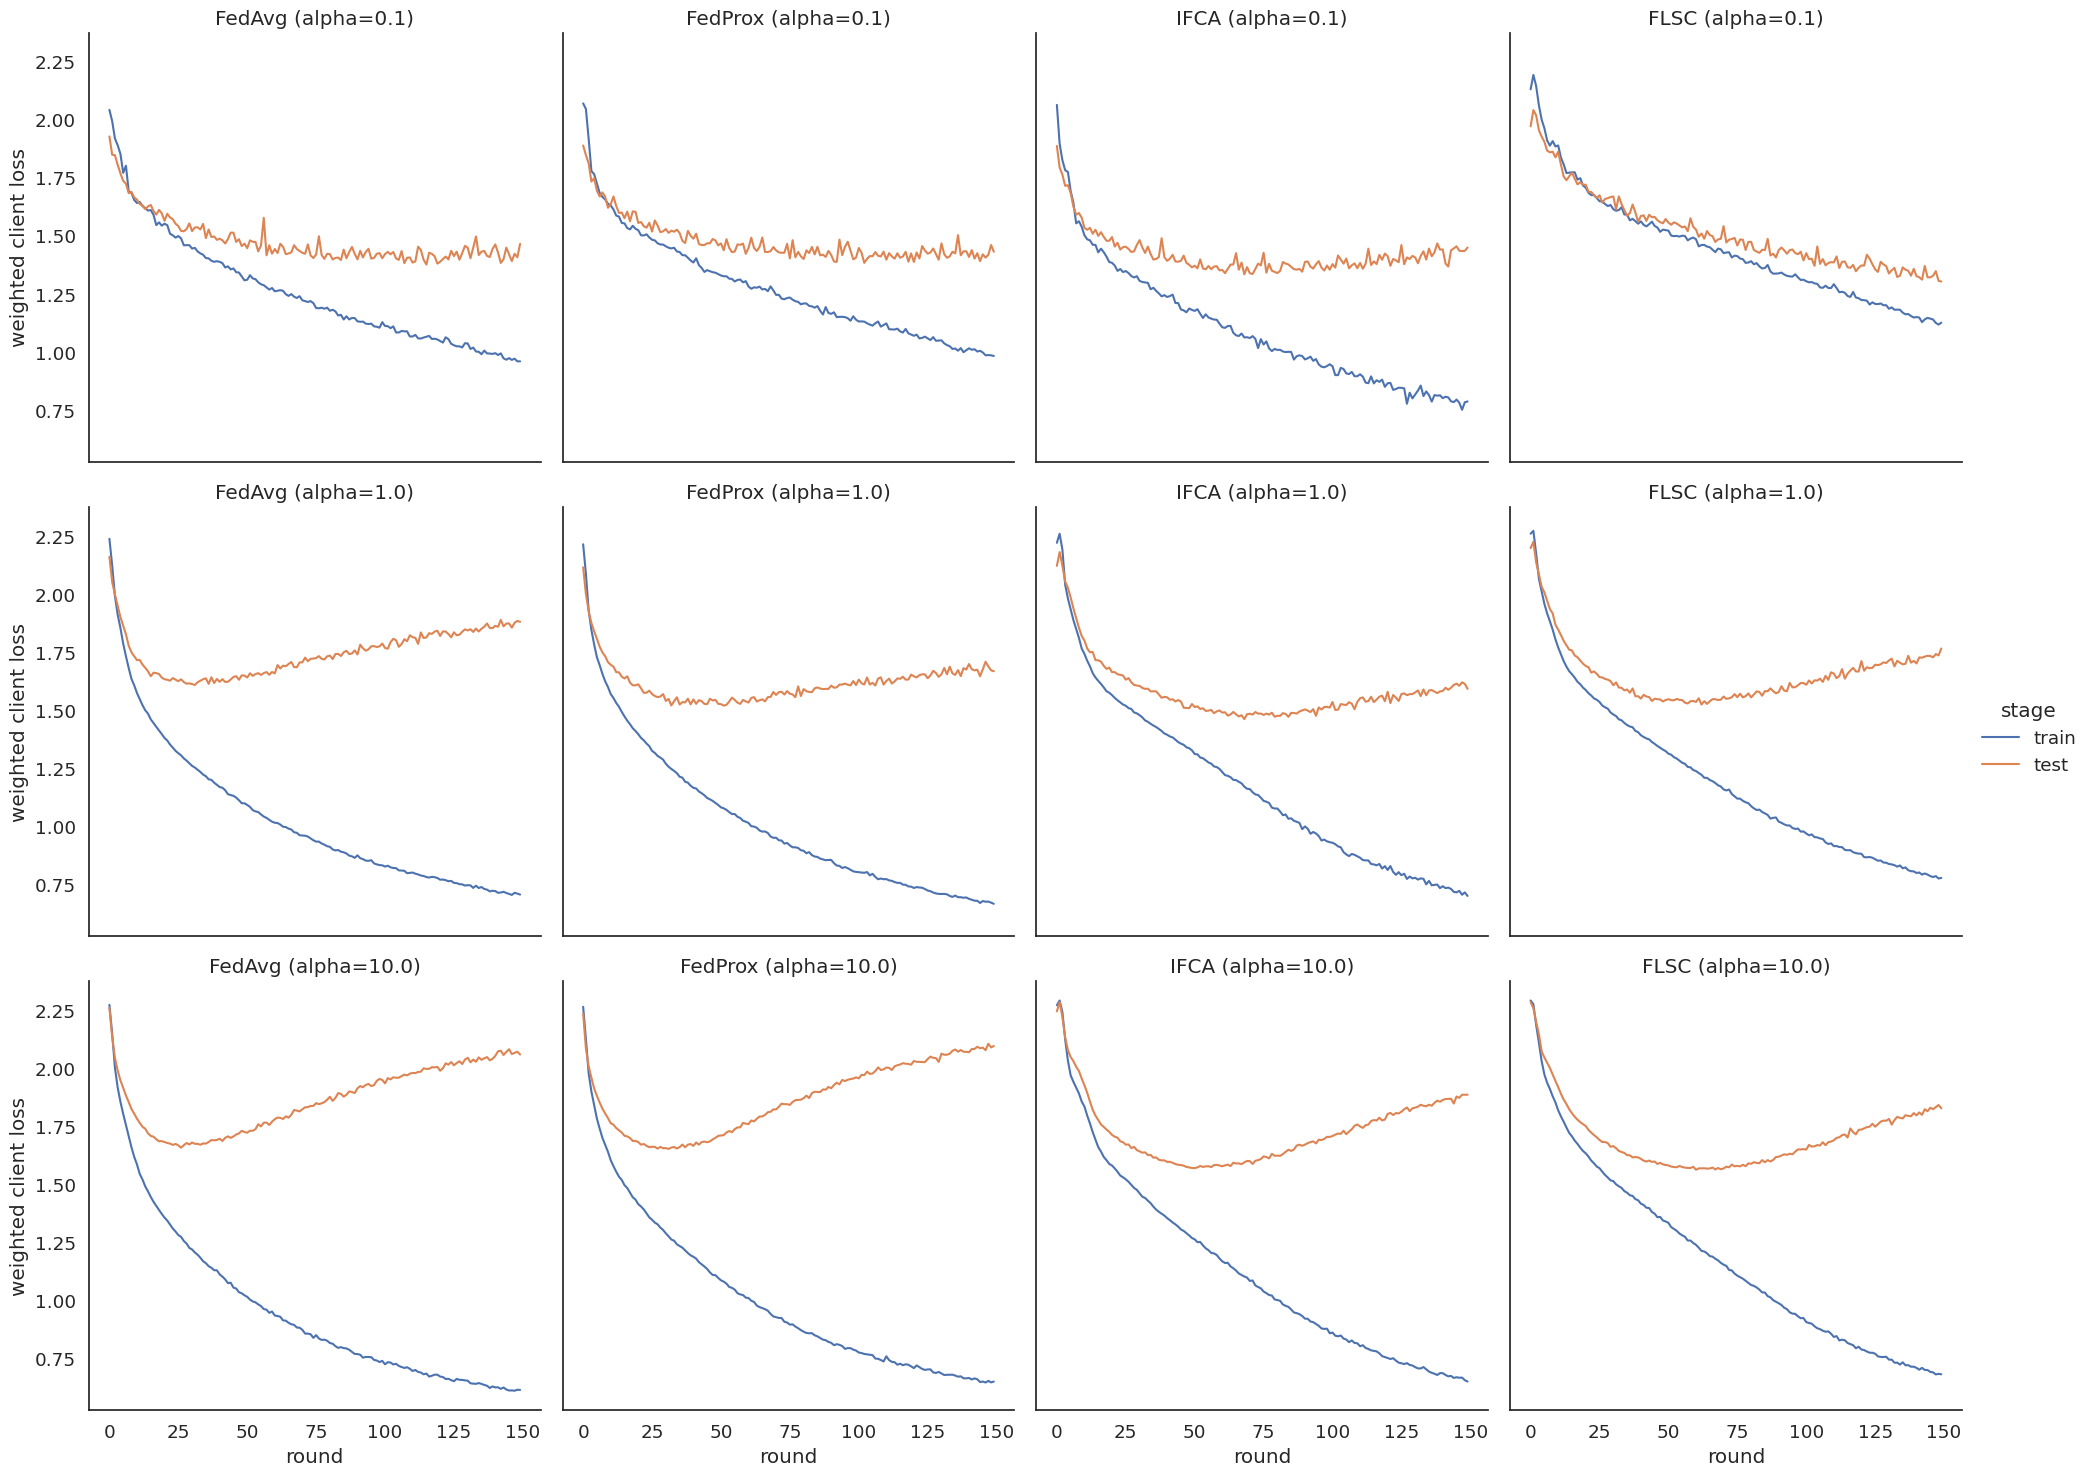

In [89]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_quantity_imbalance.png"))

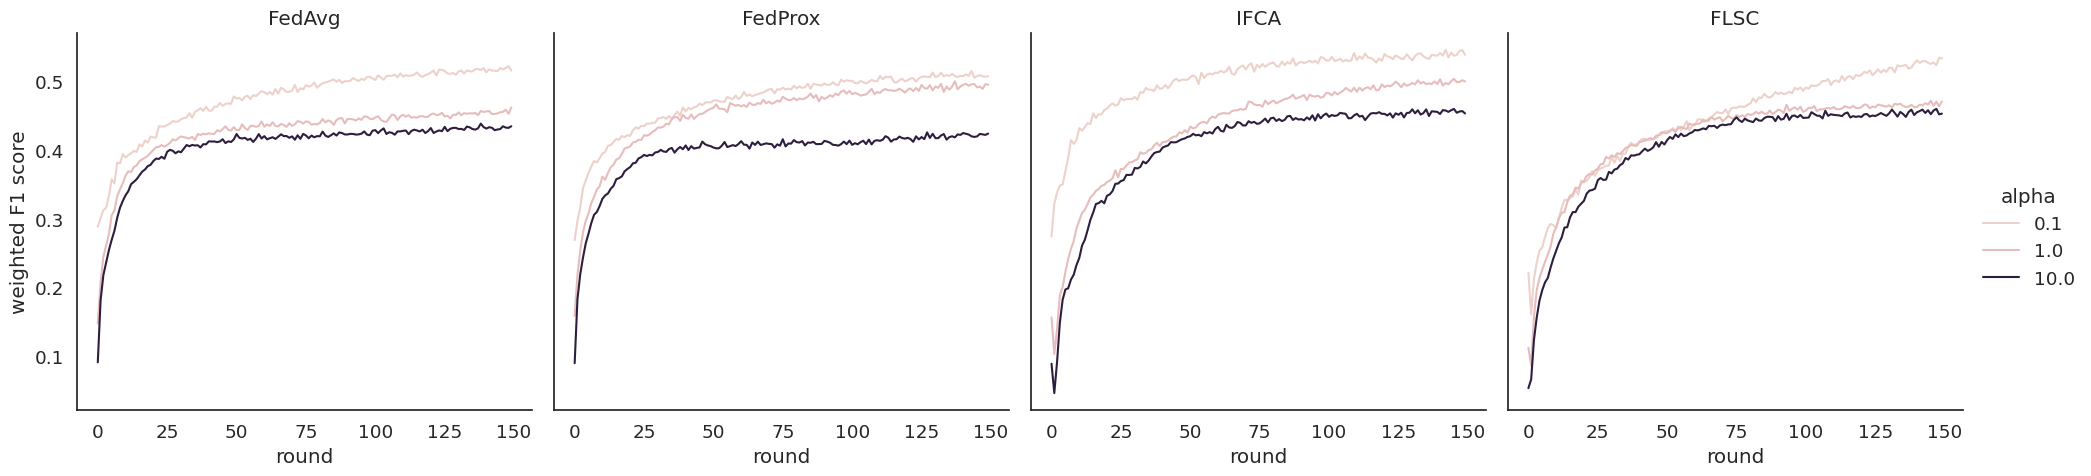

In [90]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_quantity_imbalance.png"))

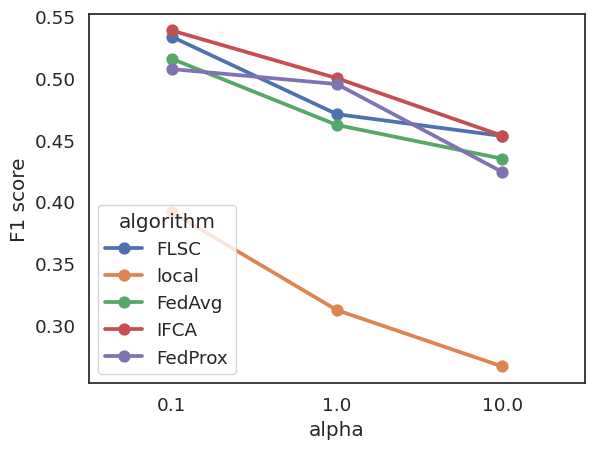

In [91]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_quantity_imbalance.png"))

In [92]:
conn.close()

### MNIST

In [93]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

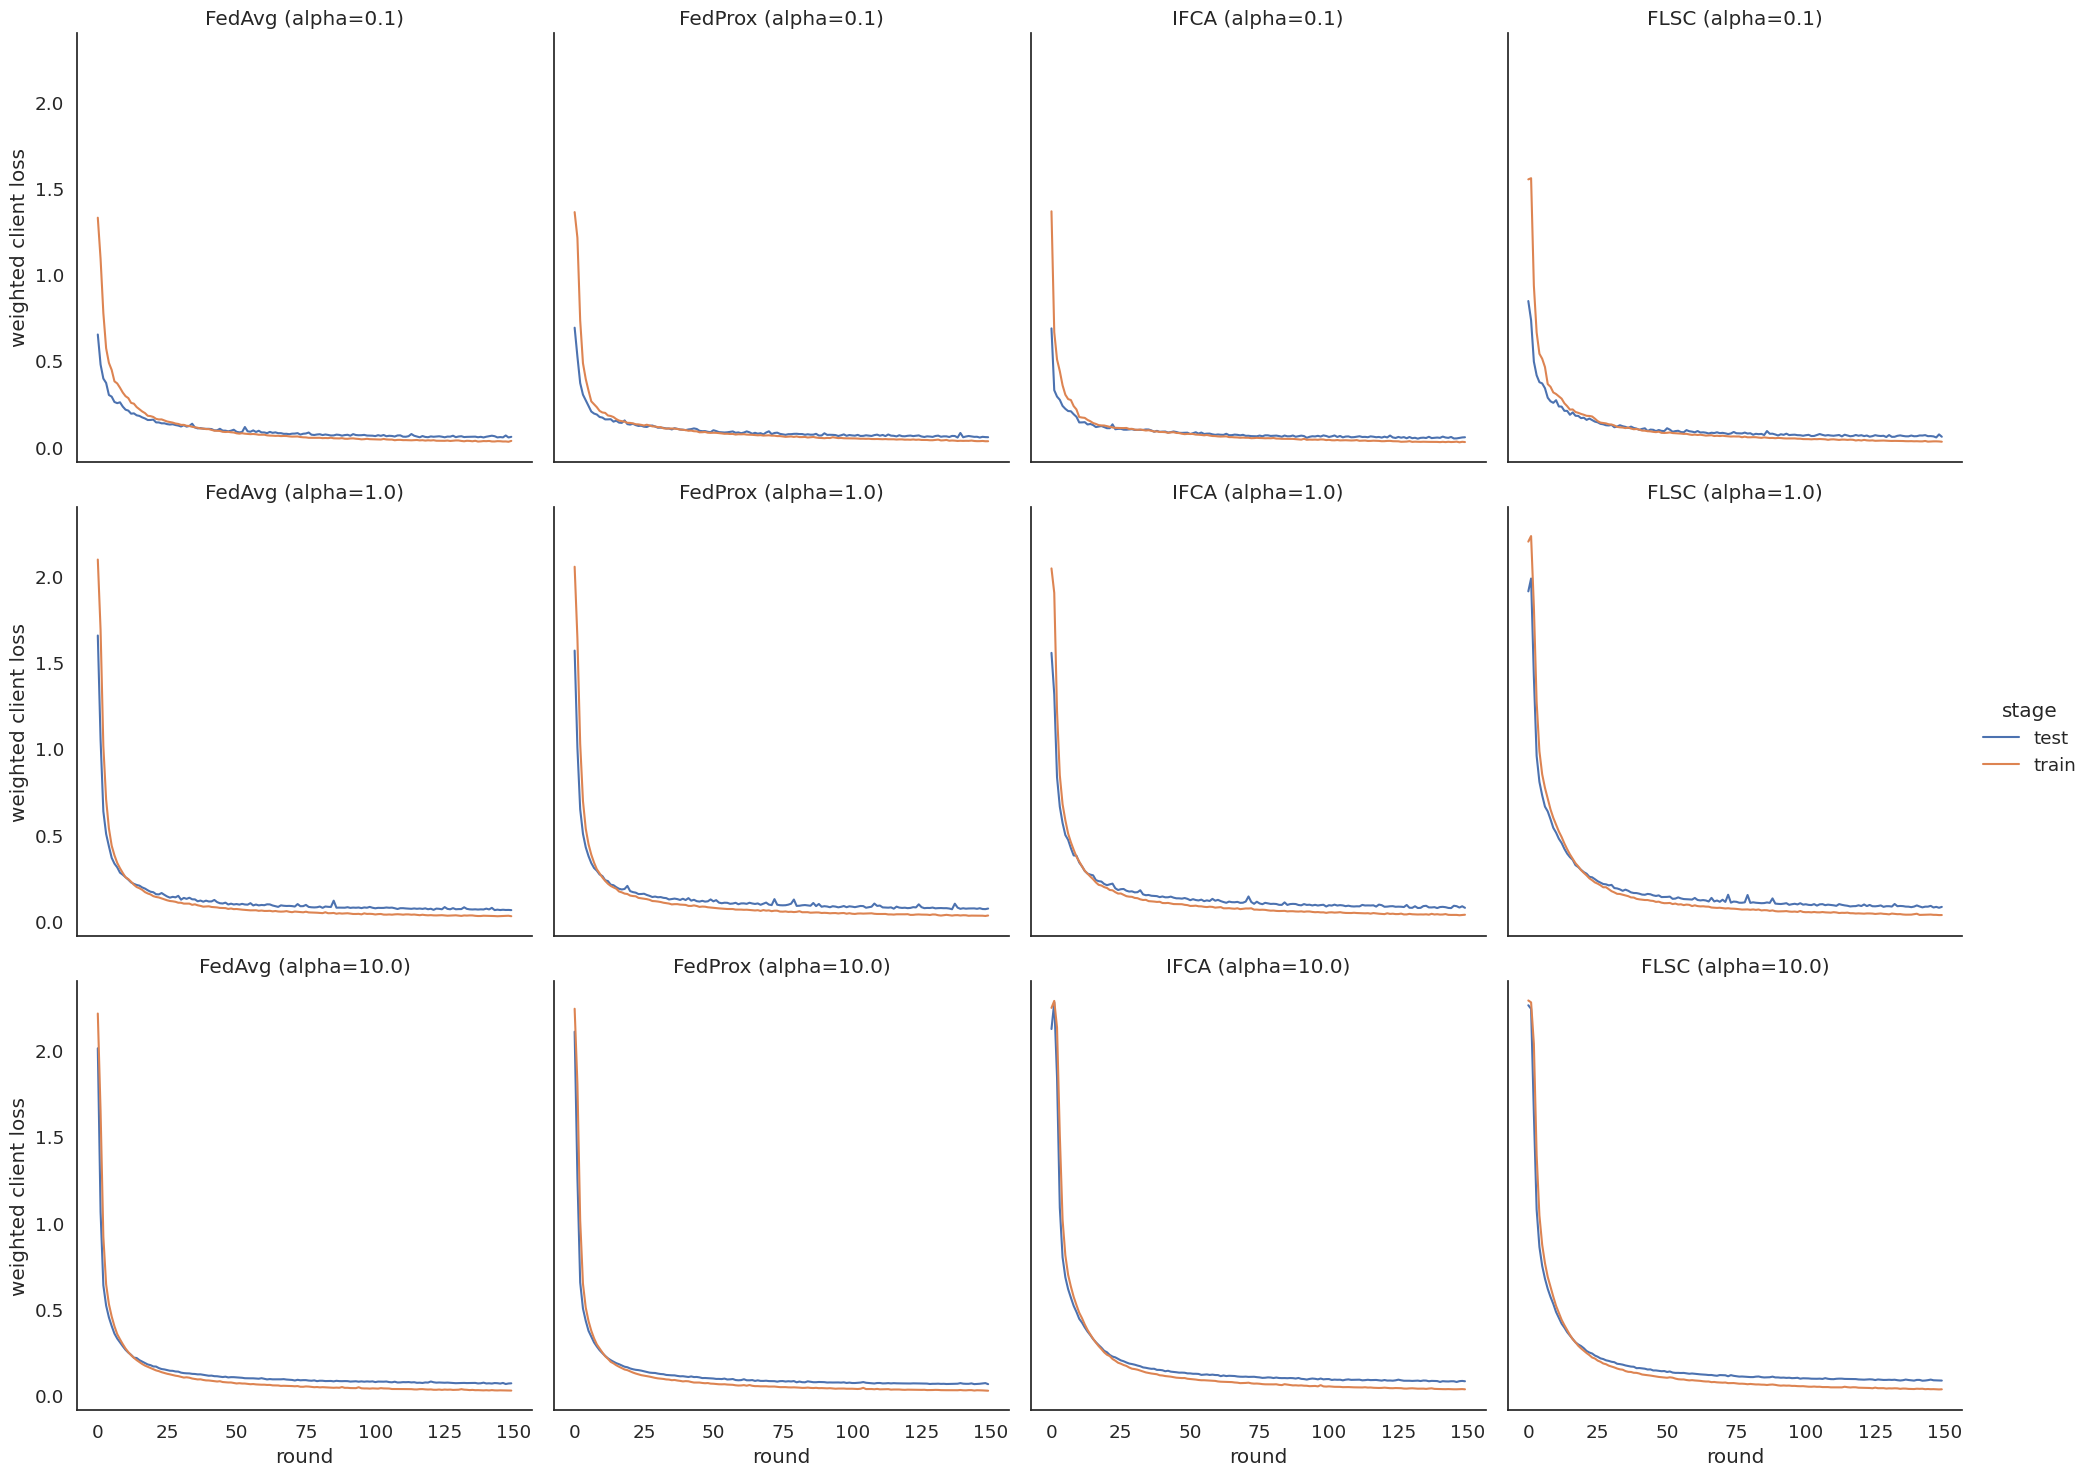

In [94]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_quantity_imbalance.png"))

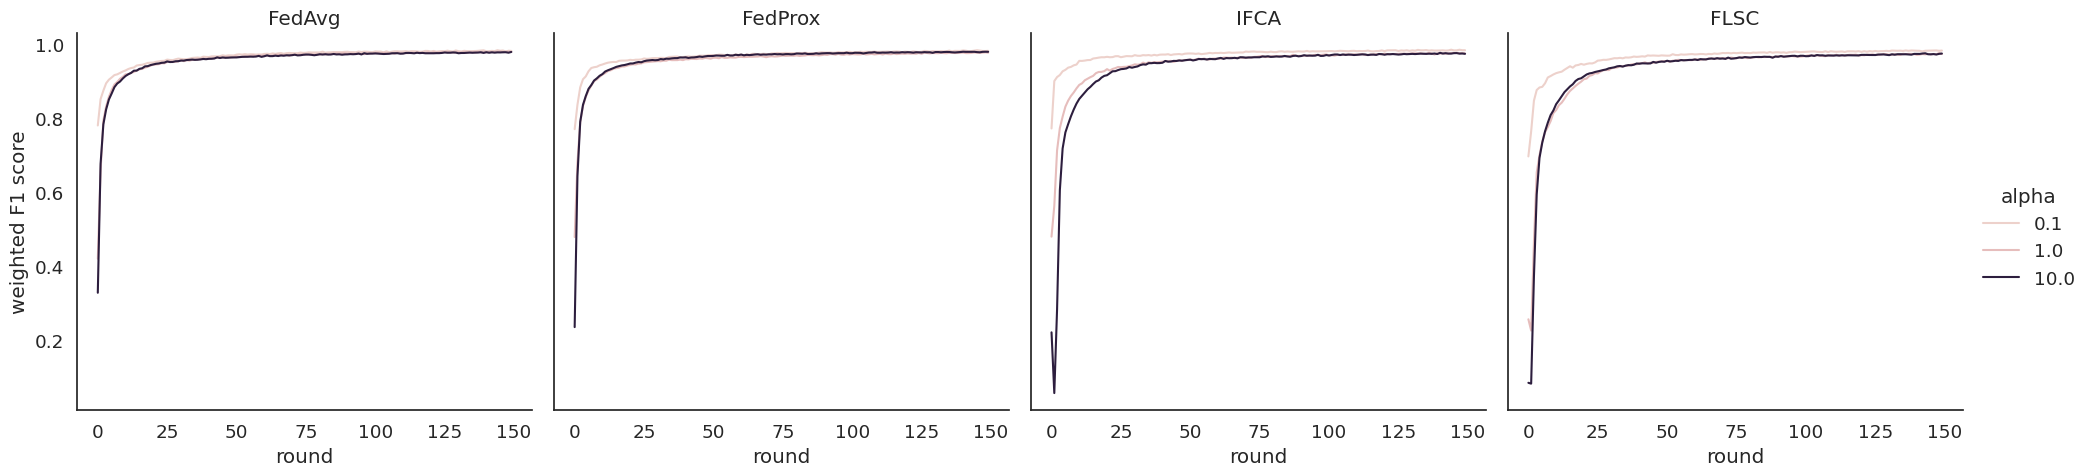

In [95]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_quantity_imbalance.png"))

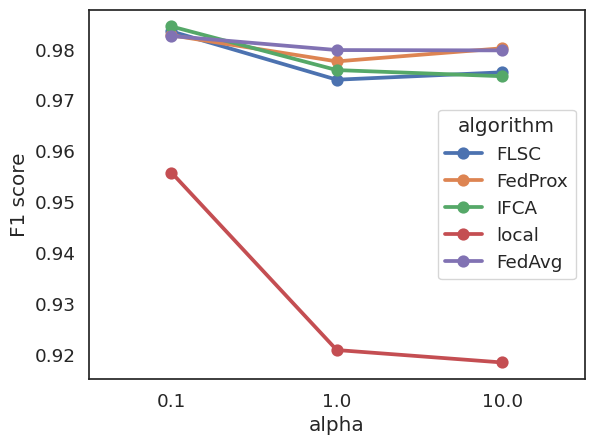

In [96]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_quantity_imbalance.png"))

In [97]:
conn.close()

## Label (Distribution) Imbalance

### CIFAR-10

In [98]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

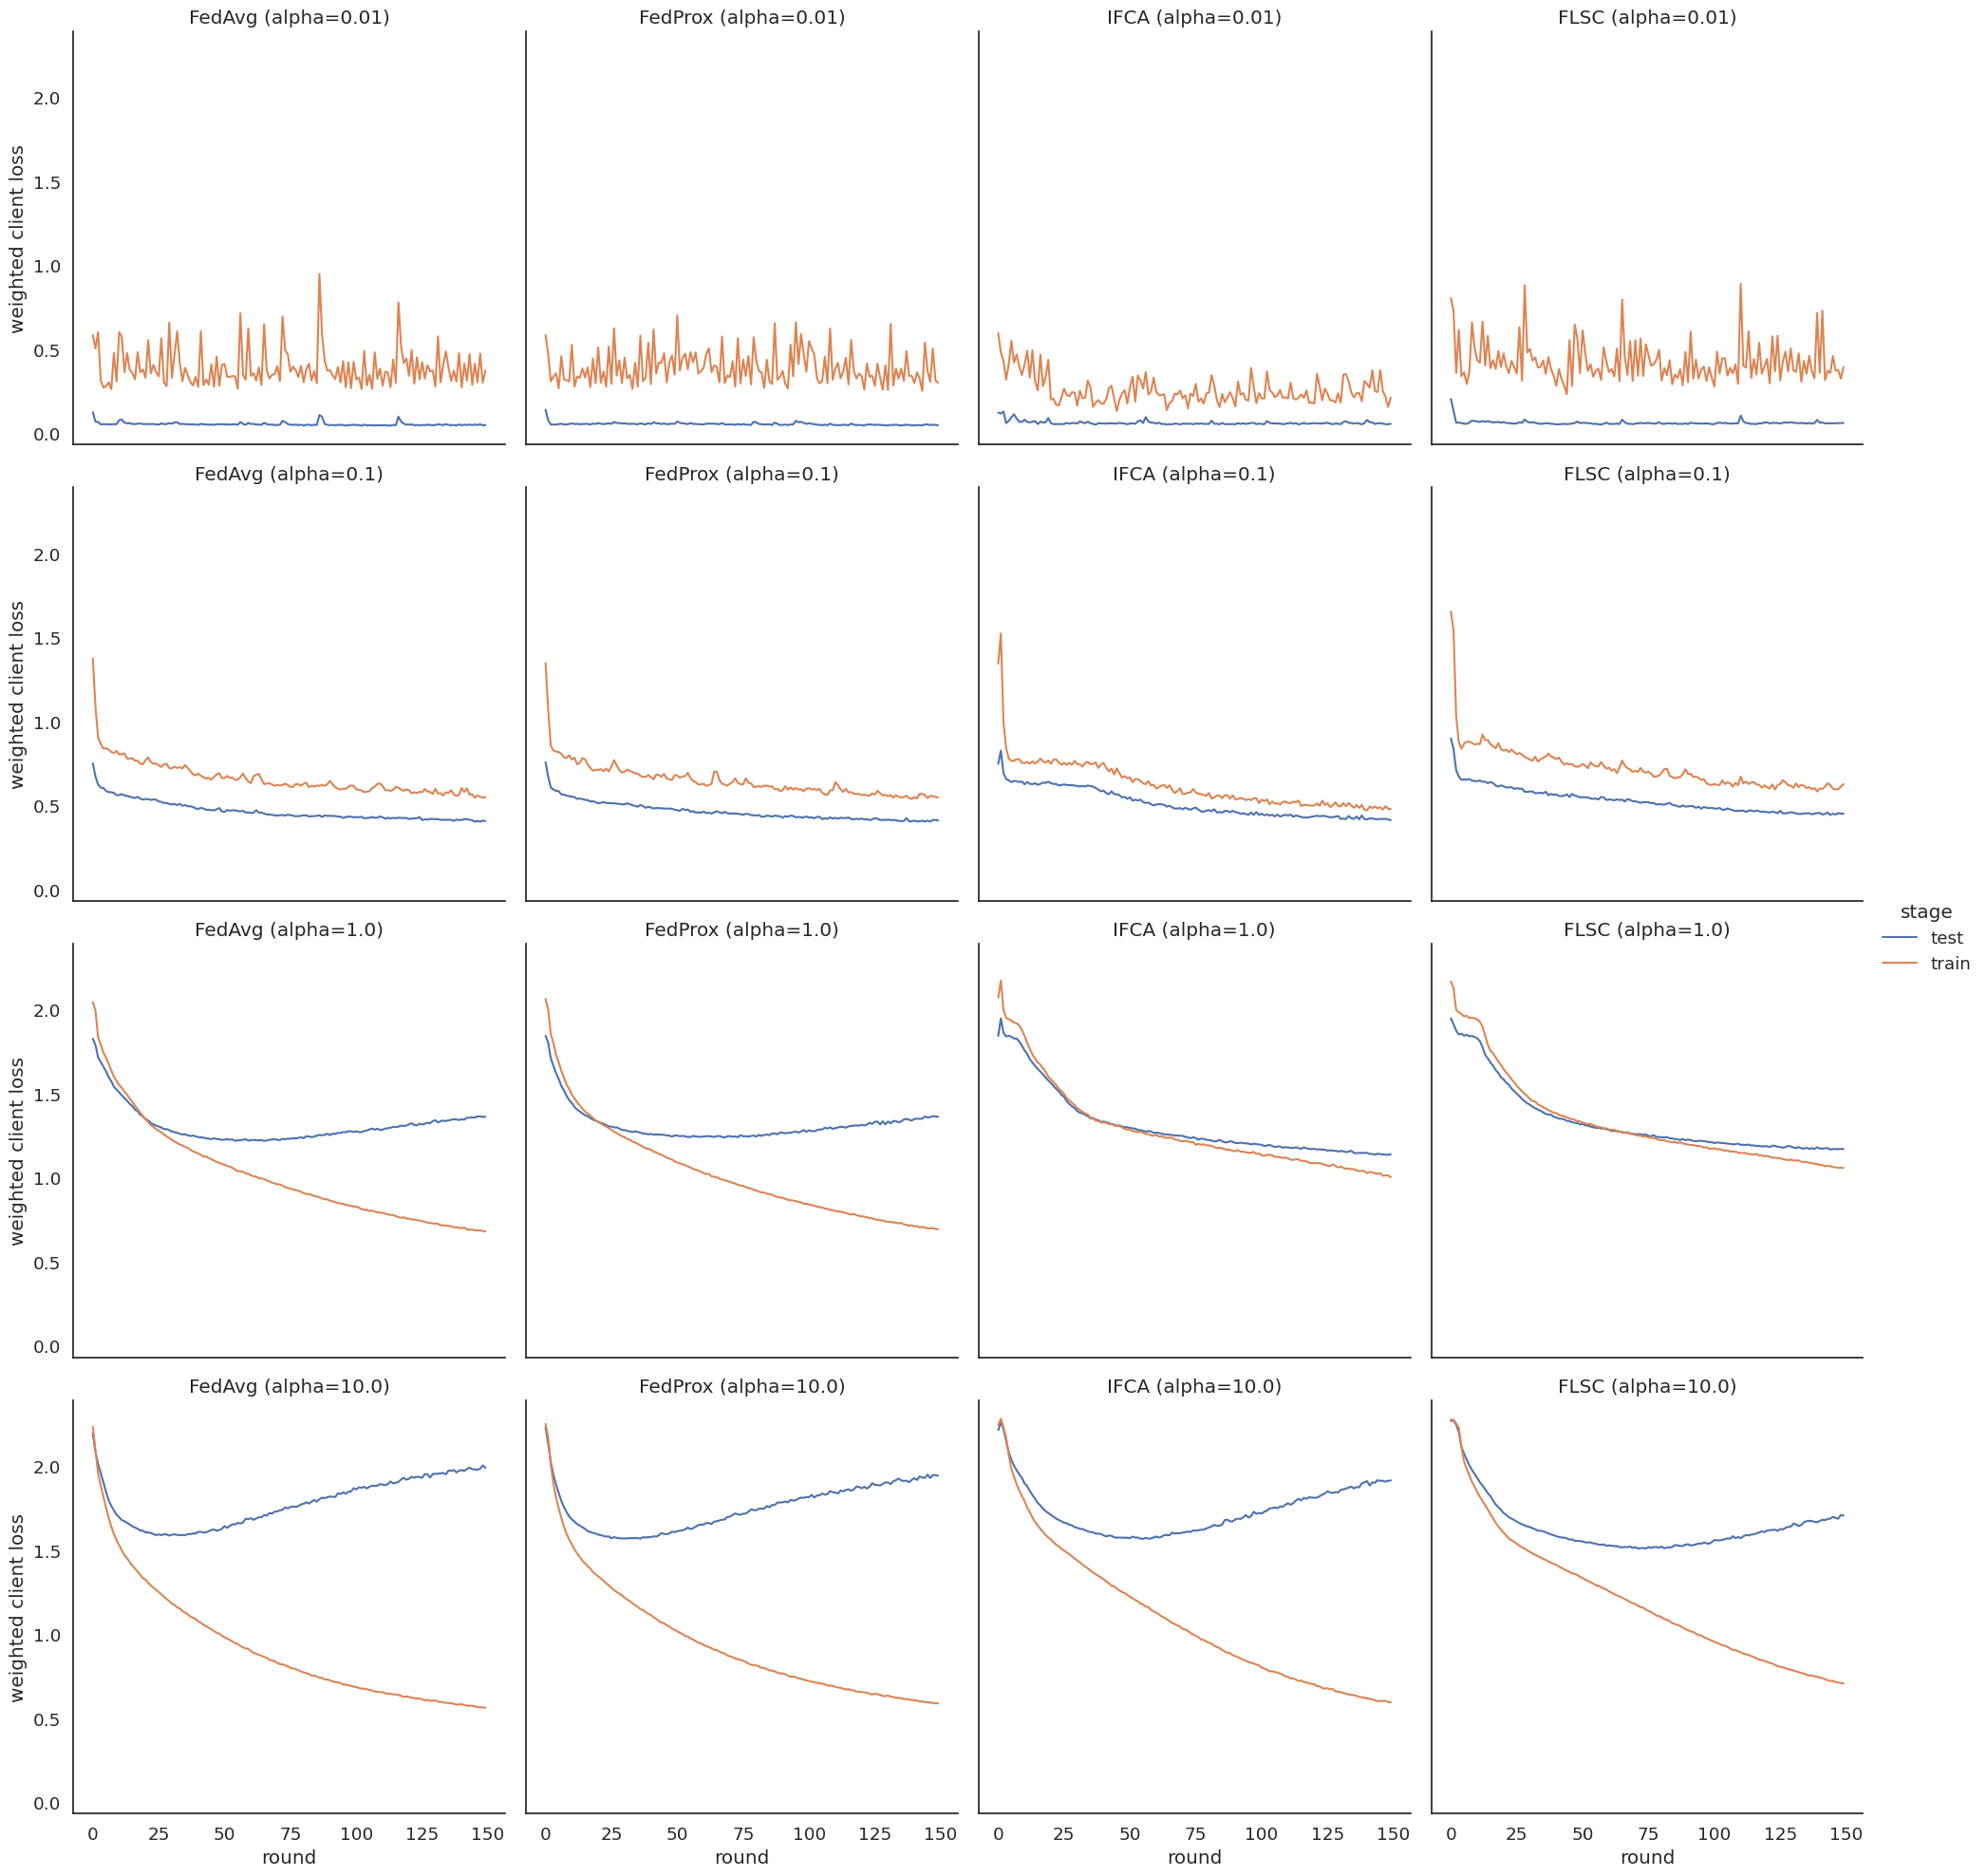

In [99]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_label_distribution_imbalance.png"))

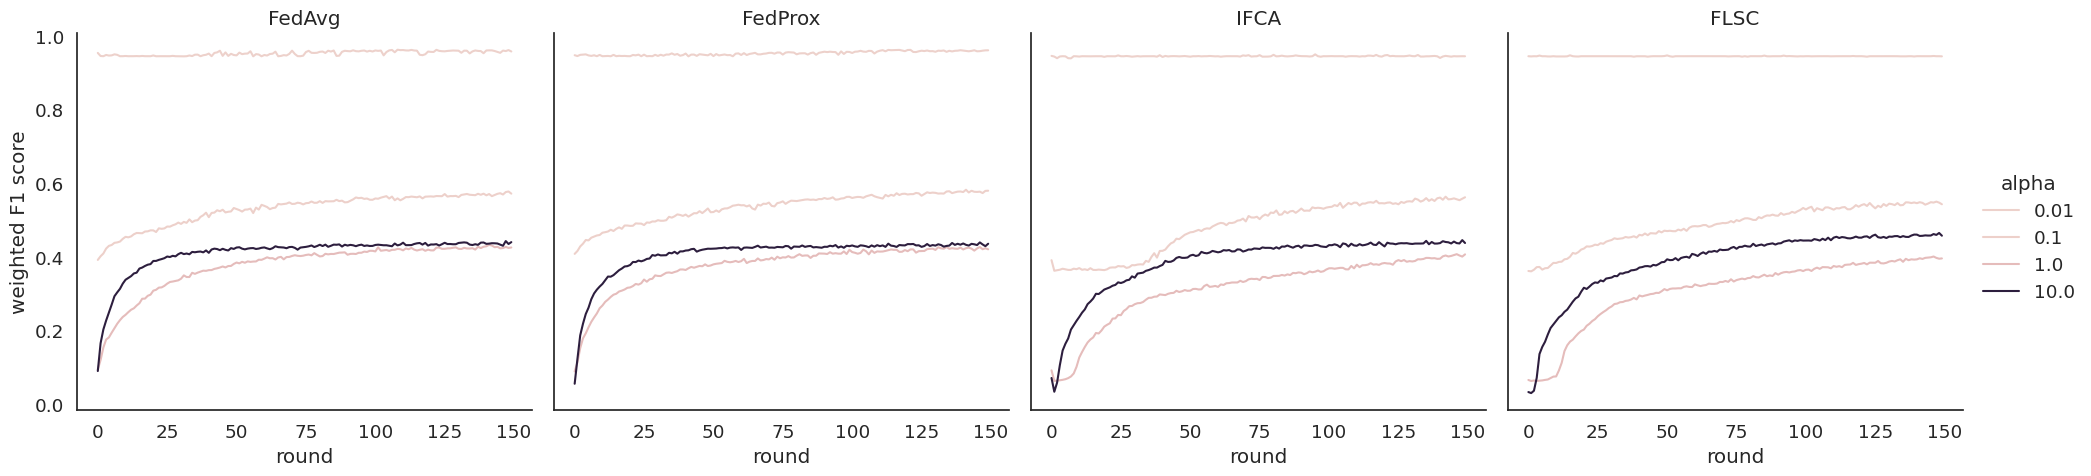

In [100]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_label_distribution_imbalance.png"))

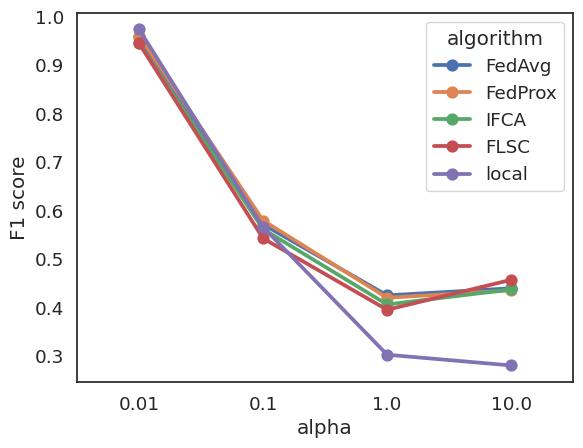

In [101]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_label_distribution_imbalance.png"))

In [102]:
conn.close()

### MNIST

In [103]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

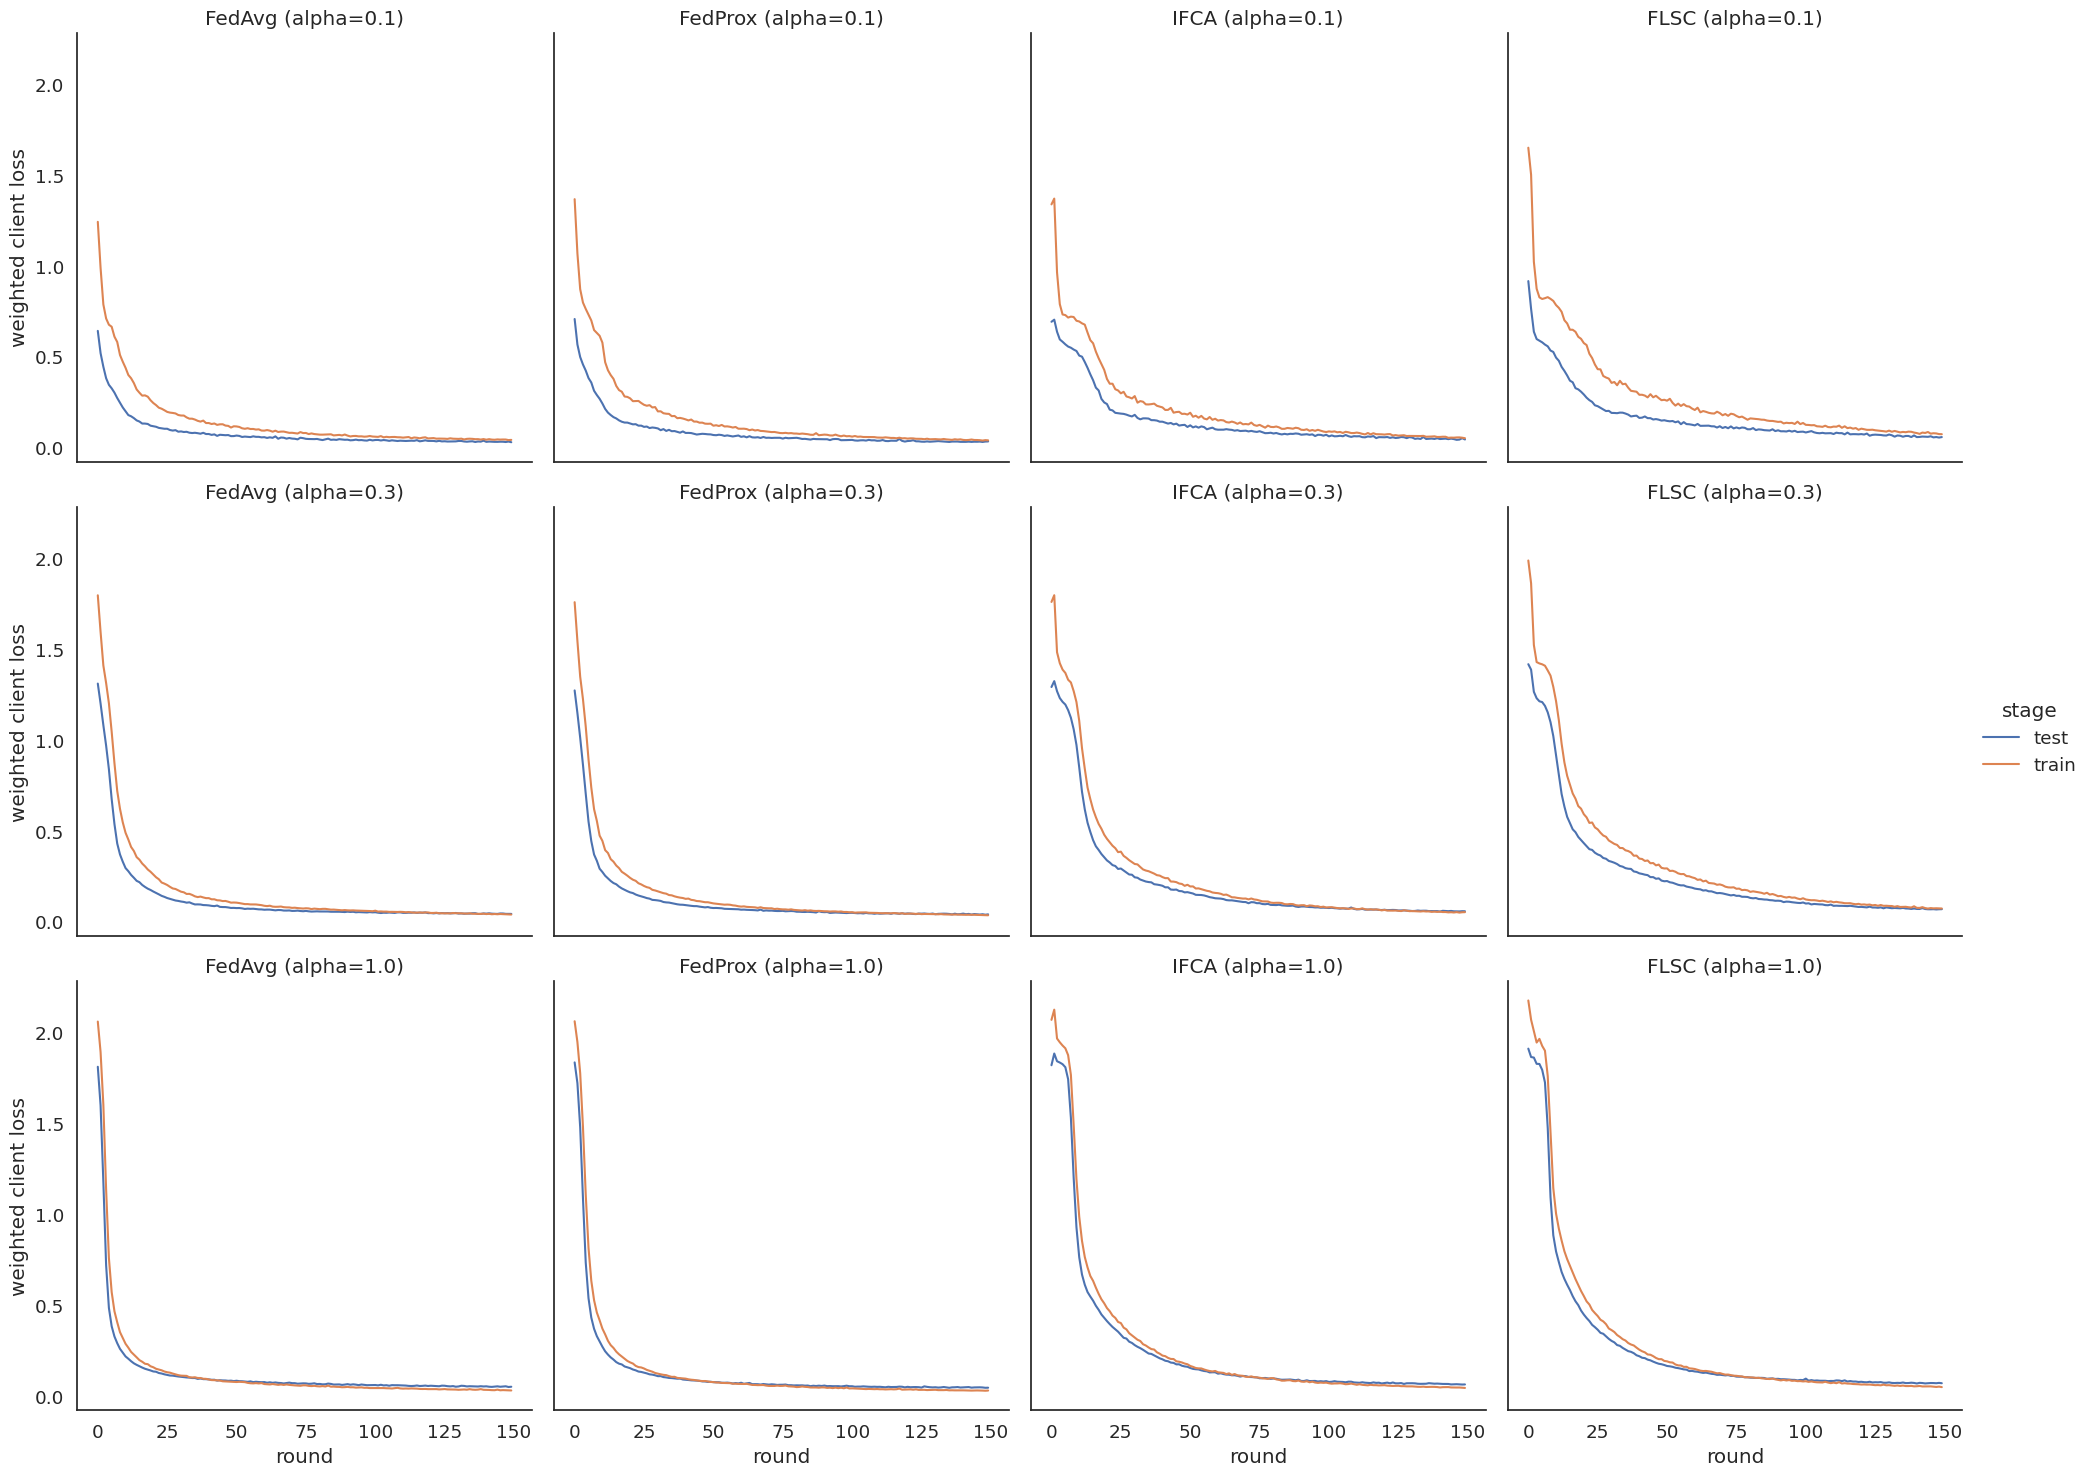

In [104]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_label_distribution_imbalance.png"))

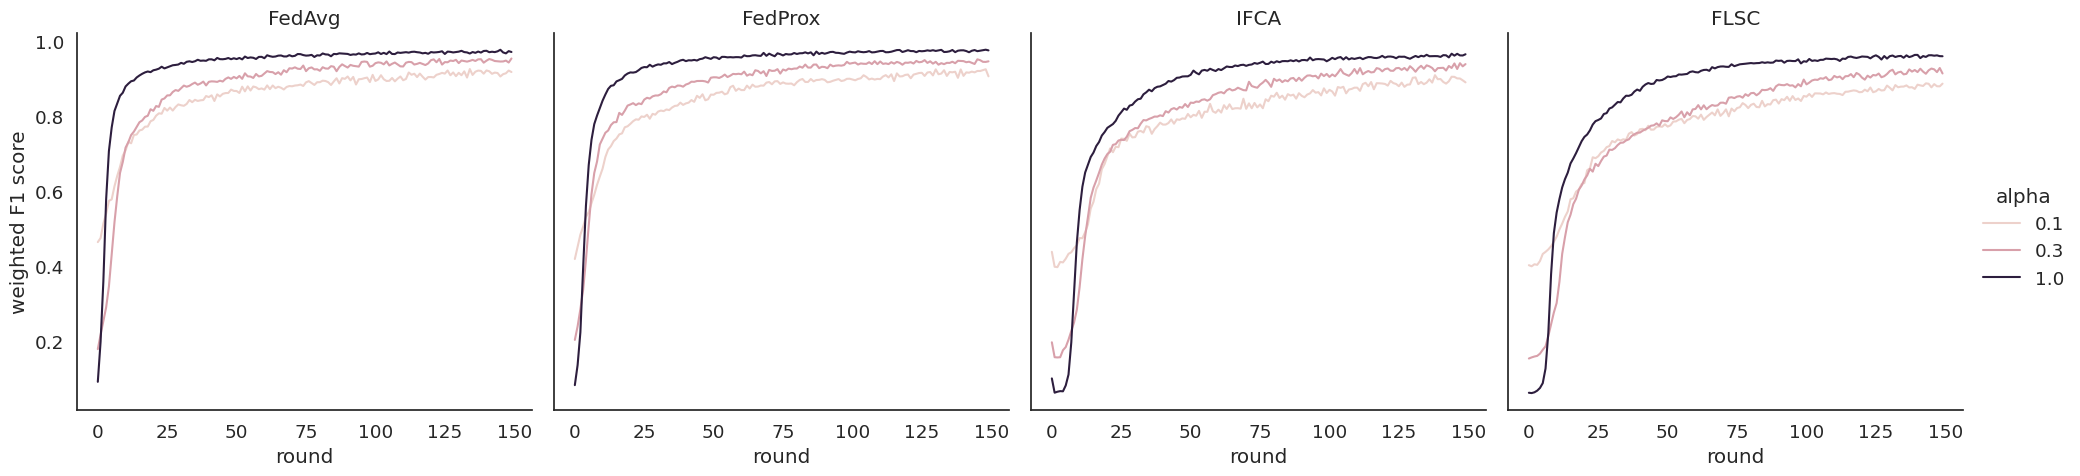

In [105]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_label_distribution_imbalance.png"))

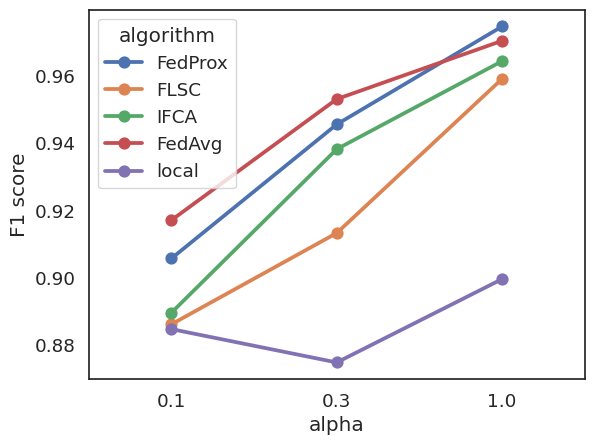

In [106]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_label_distribution_imbalance.png"))

In [107]:
conn.close()

## Feature (Distribution) Imbalance

### CIFAR-10

In [108]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

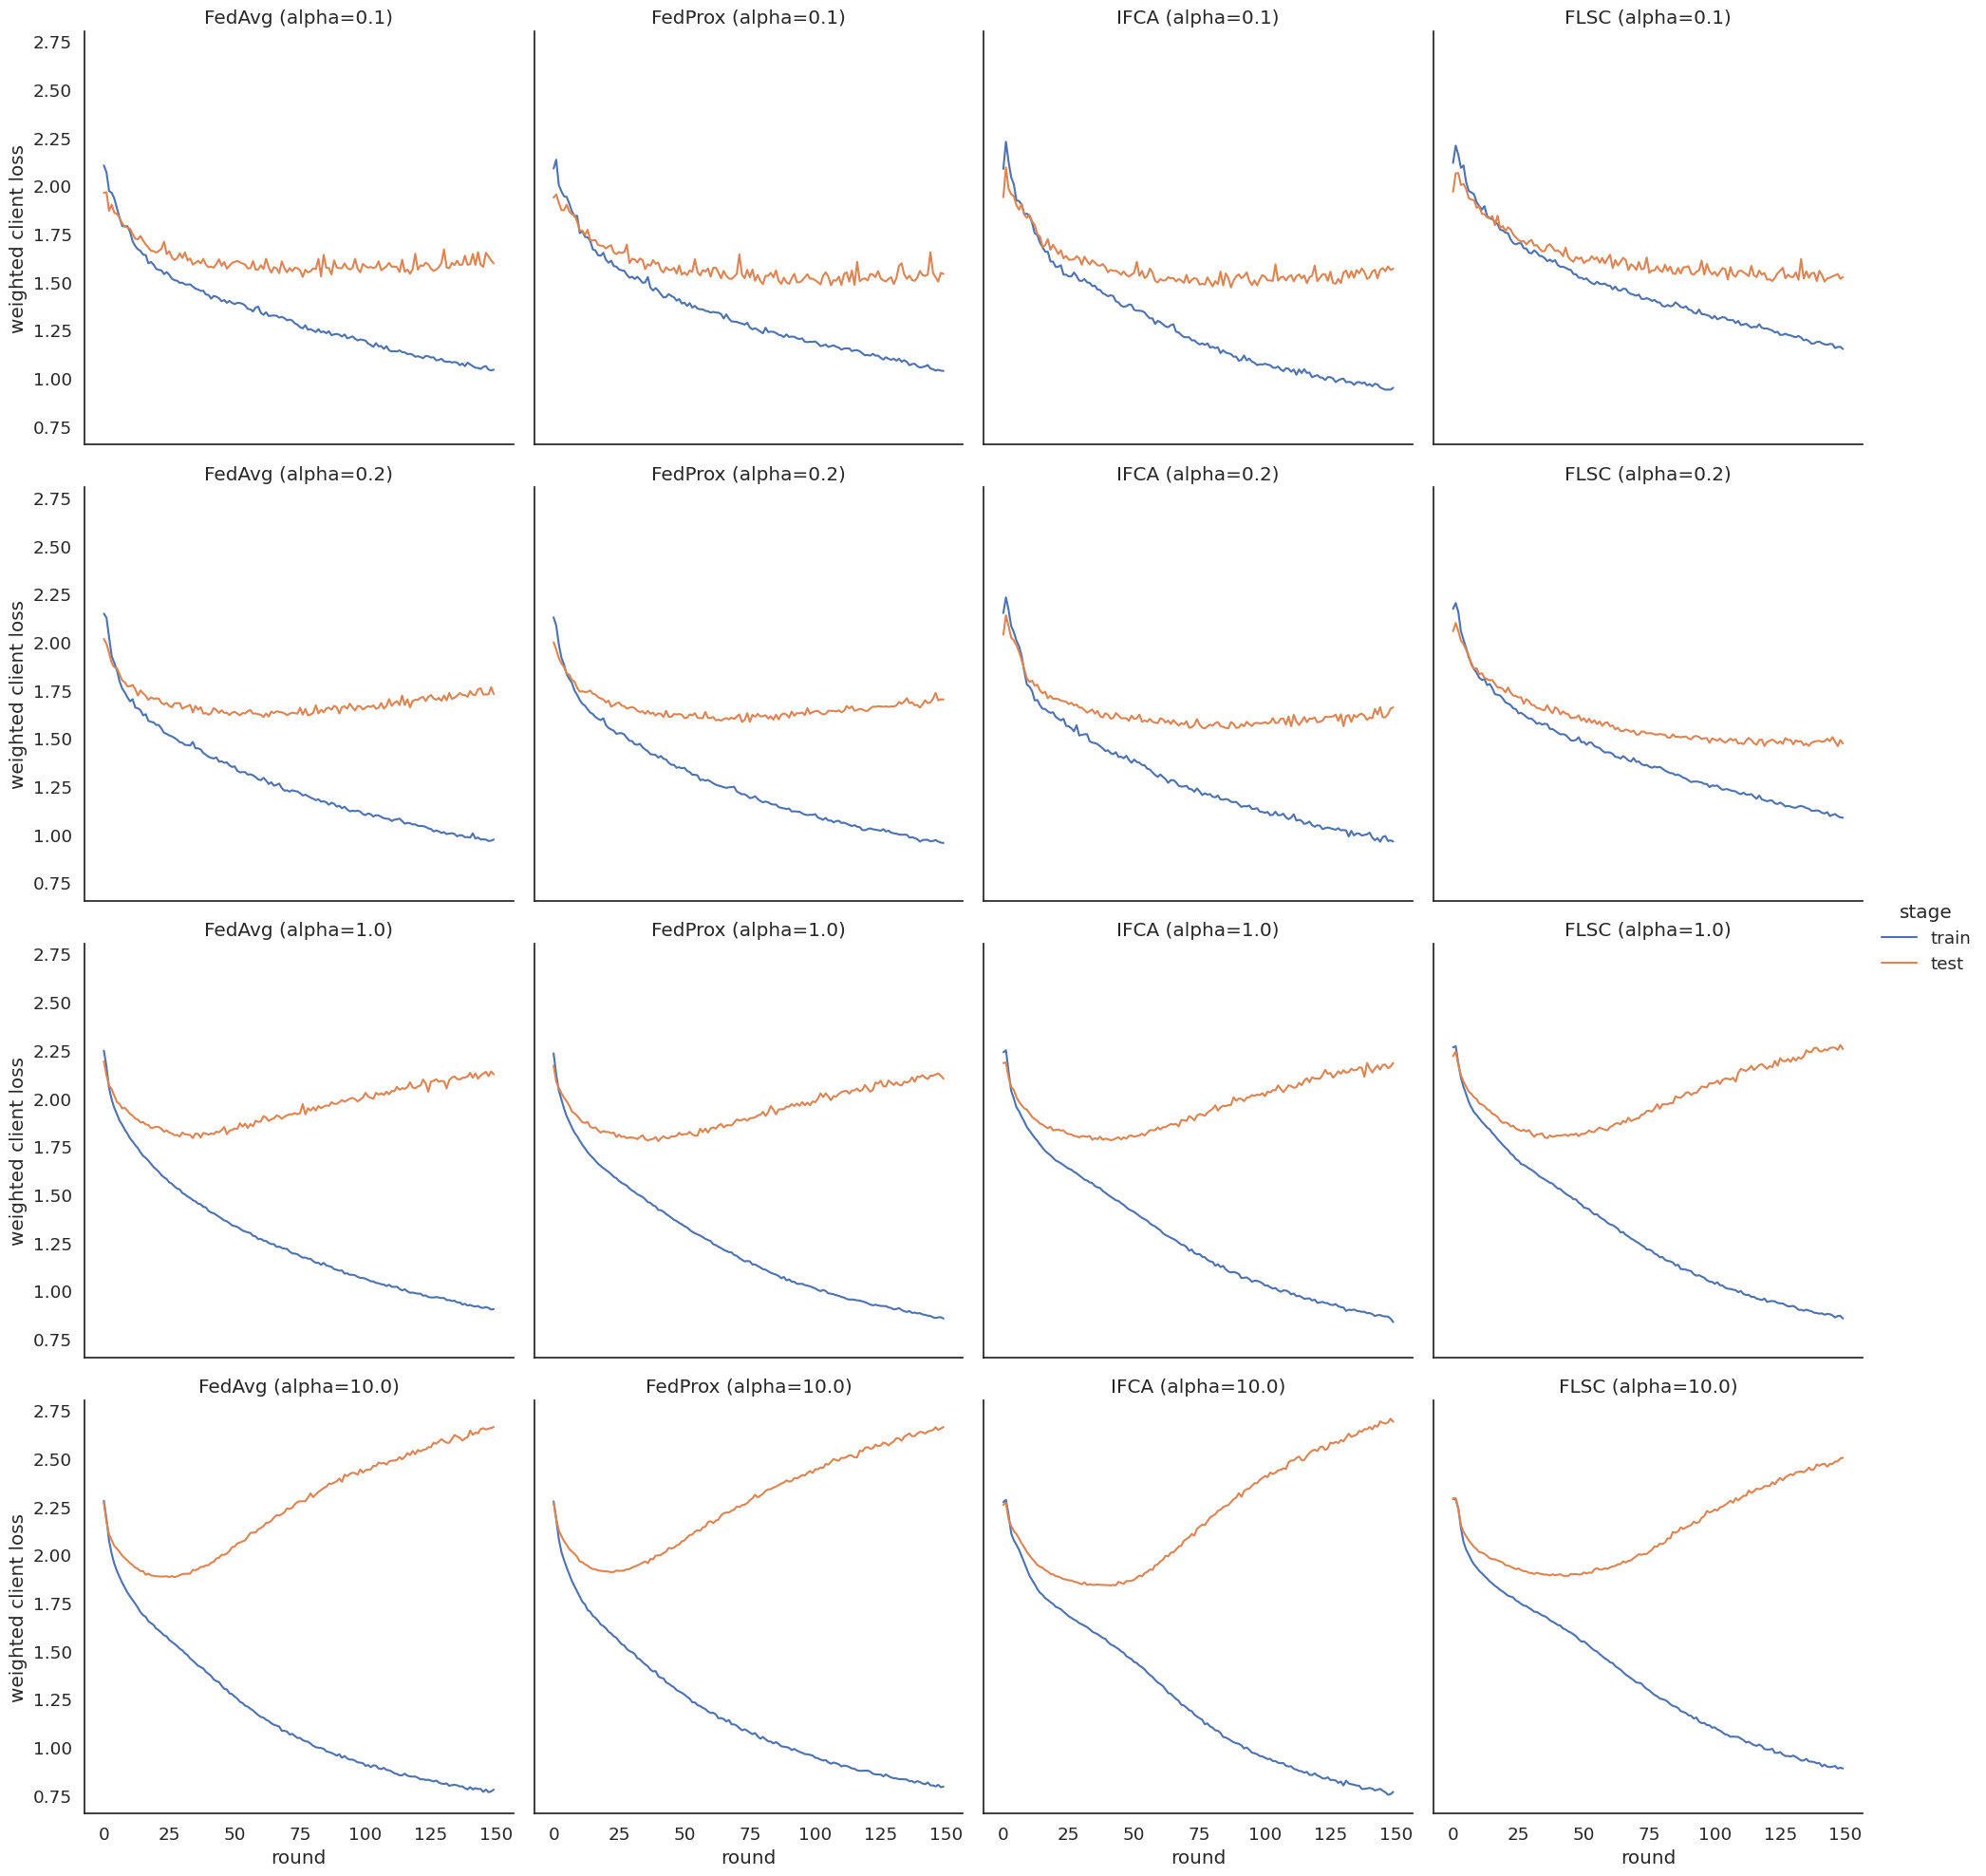

In [109]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_feature_distribution_imbalance.png"))

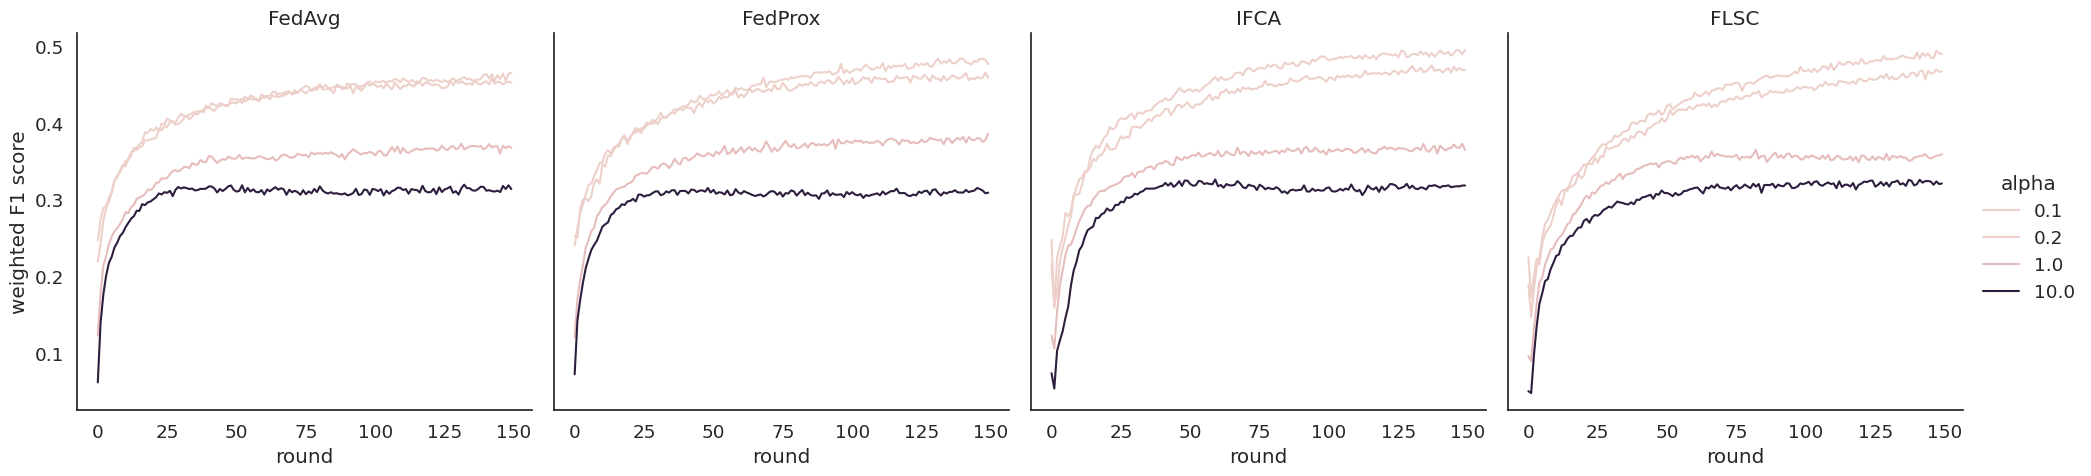

In [110]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_feature_distribution_imbalance.png"))

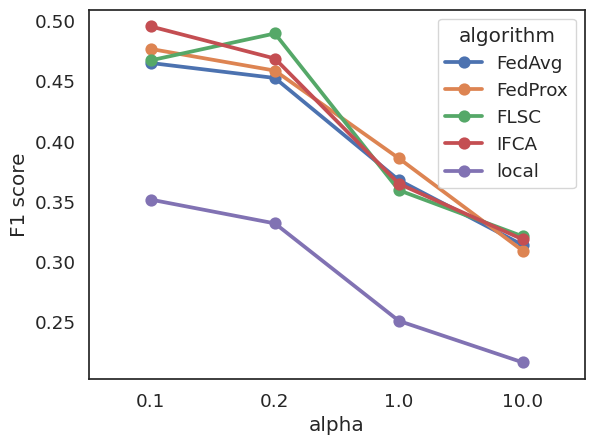

In [111]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_feature_distribution_imbalance.png"))

In [112]:
conn.close()

### MNIST

In [113]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

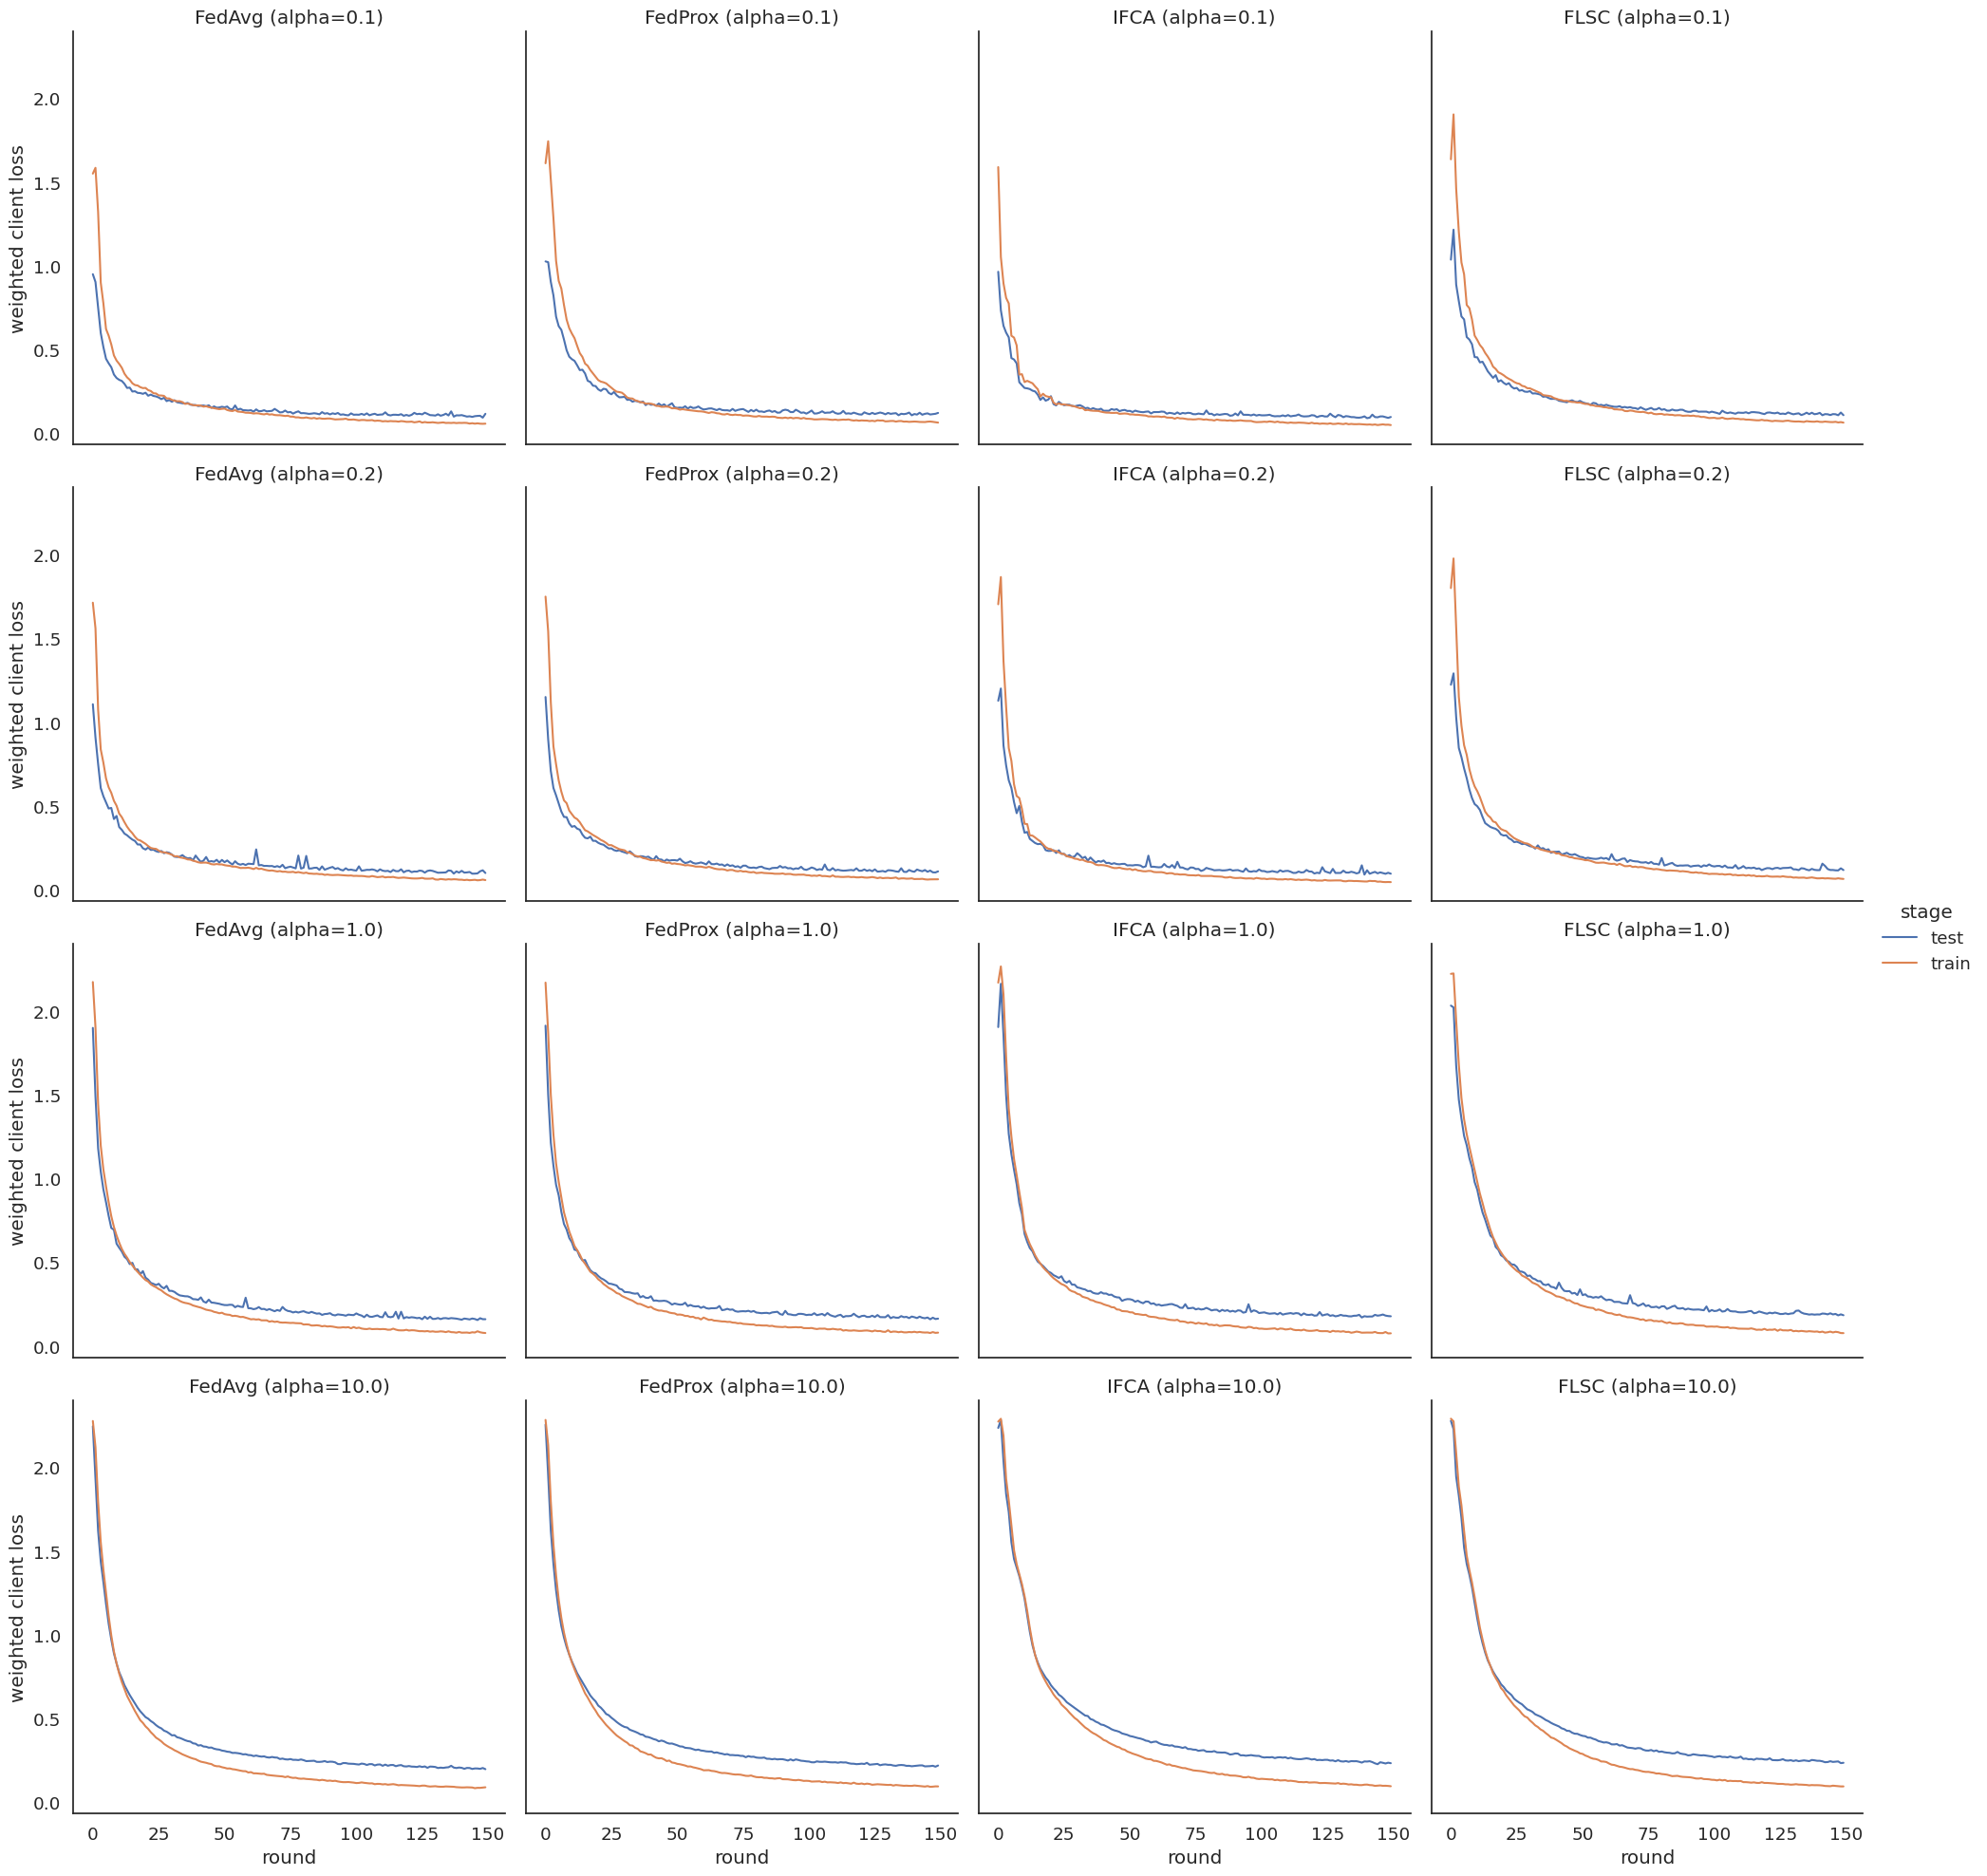

In [114]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_feature_distribution_imbalance.png"))

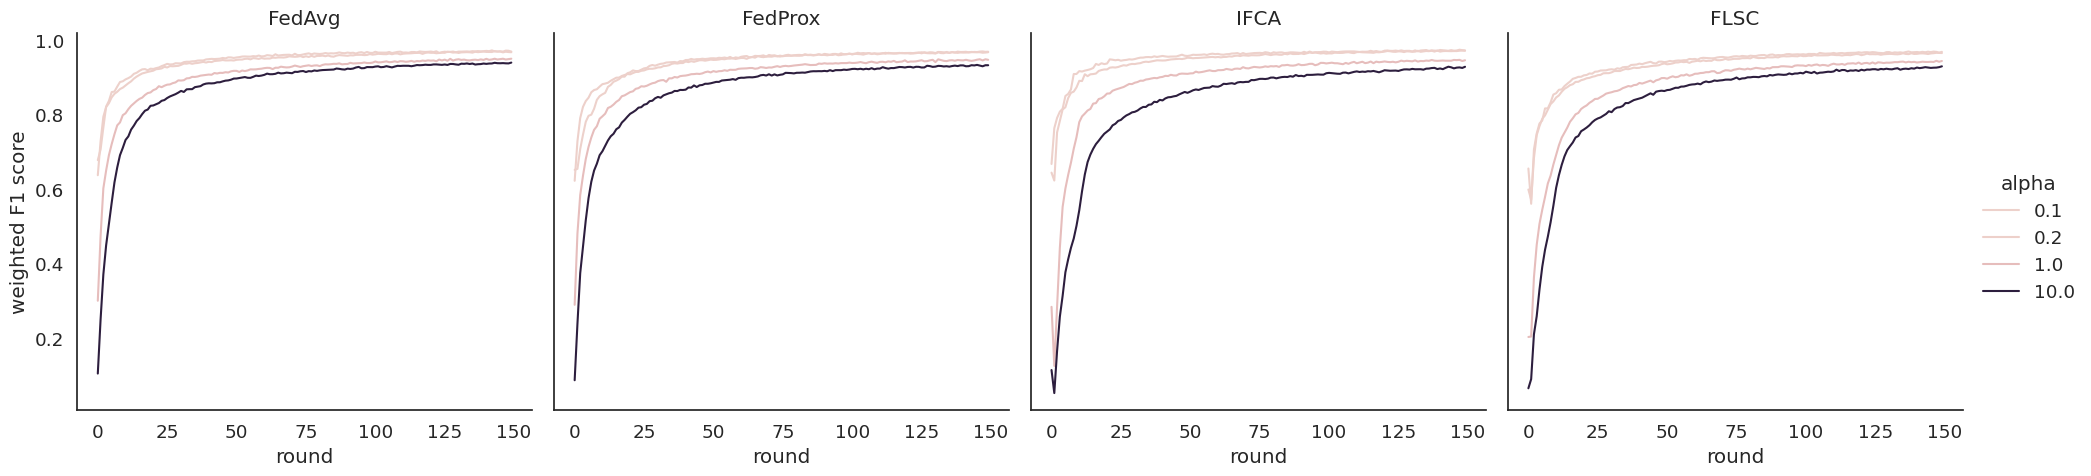

In [115]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_feature_distribution_imbalance.png"))

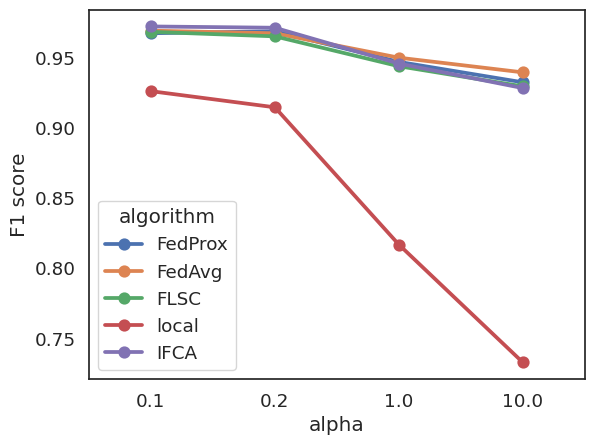

In [116]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_feature_distribution_imbalance.png"))

In [117]:
conn.close()

# Client Benefit

## Quantity Imbalance

### CIFAR-10

In [118]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

In [119]:
benefits = compute_client_benefit(conn, data)

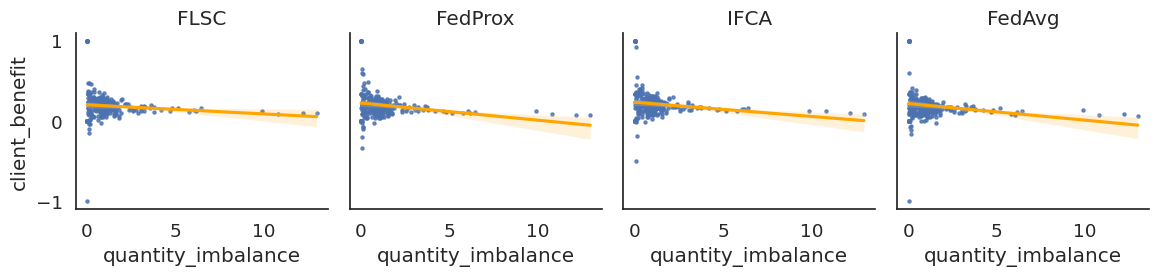

In [120]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10.png"))

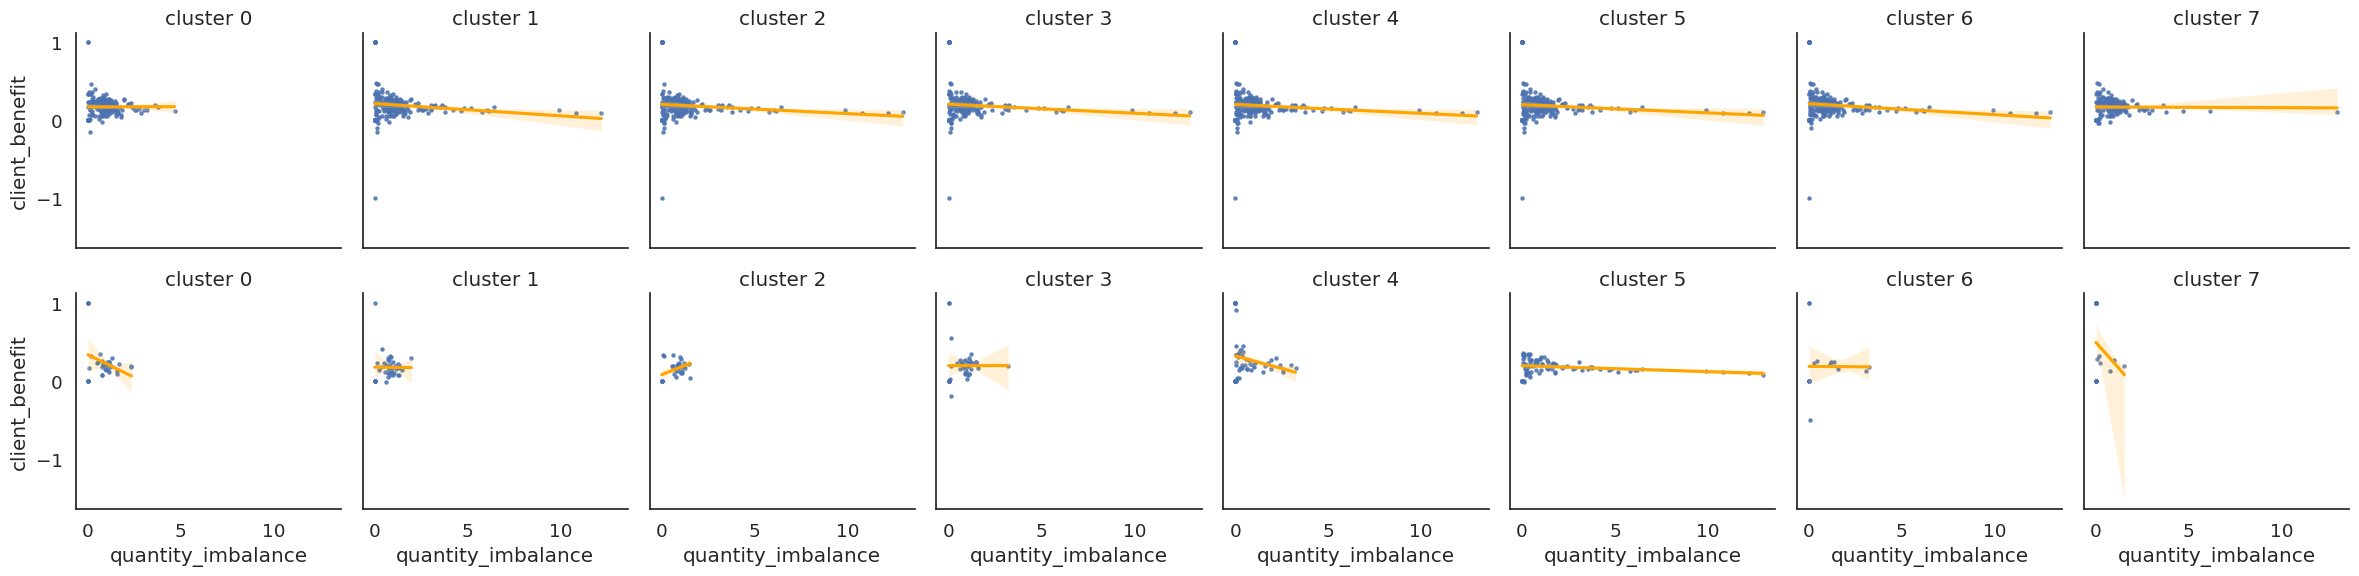

In [121]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10_clusters.png"))

### MNIST

In [122]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

In [123]:
benefits = compute_client_benefit(conn, data)

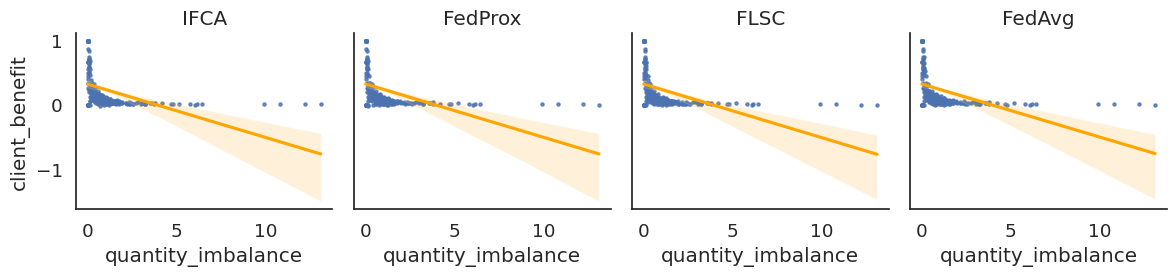

In [124]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist.png"))

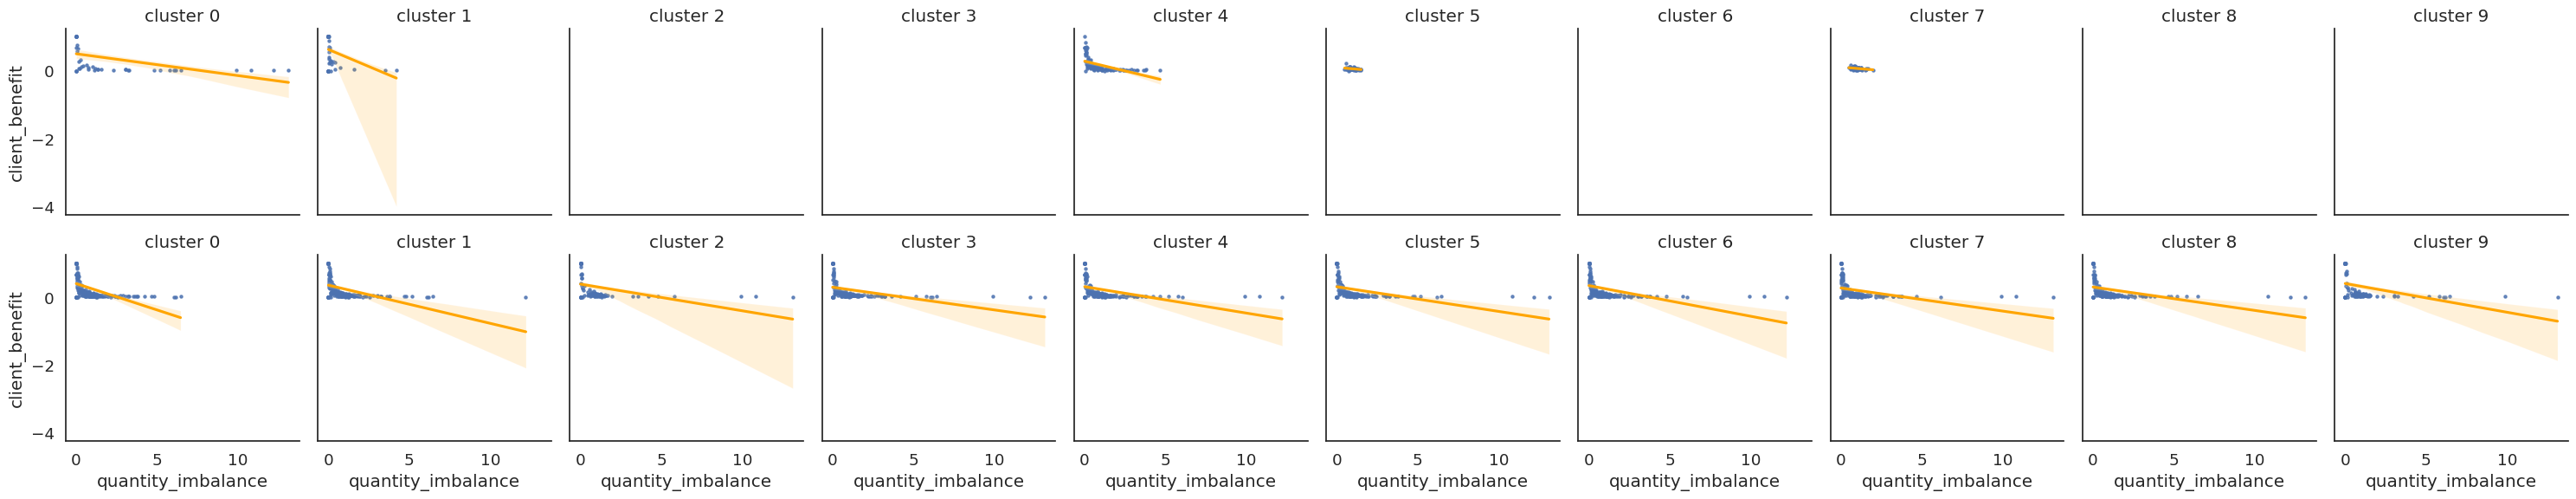

In [125]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist_clusters.png"))

## Label (Distribution) Imbalance

### CIFAR-10

In [126]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [127]:
benefits = compute_client_benefit(conn, data)

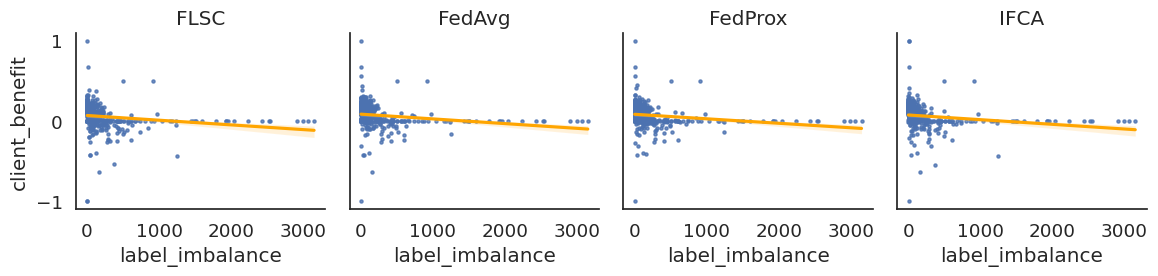

In [128]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10.png"))

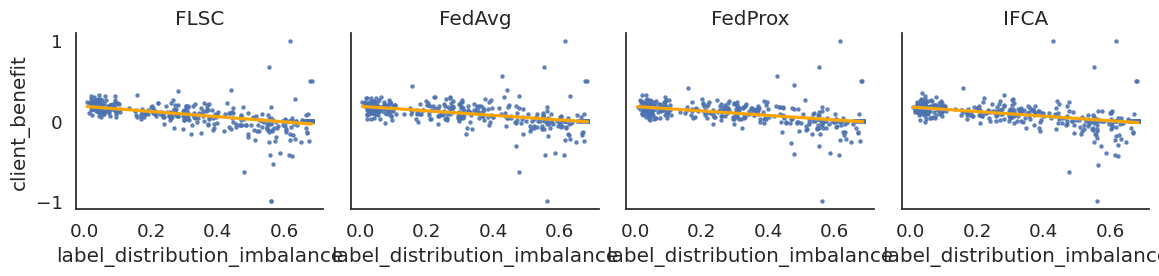

In [129]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist.png"))

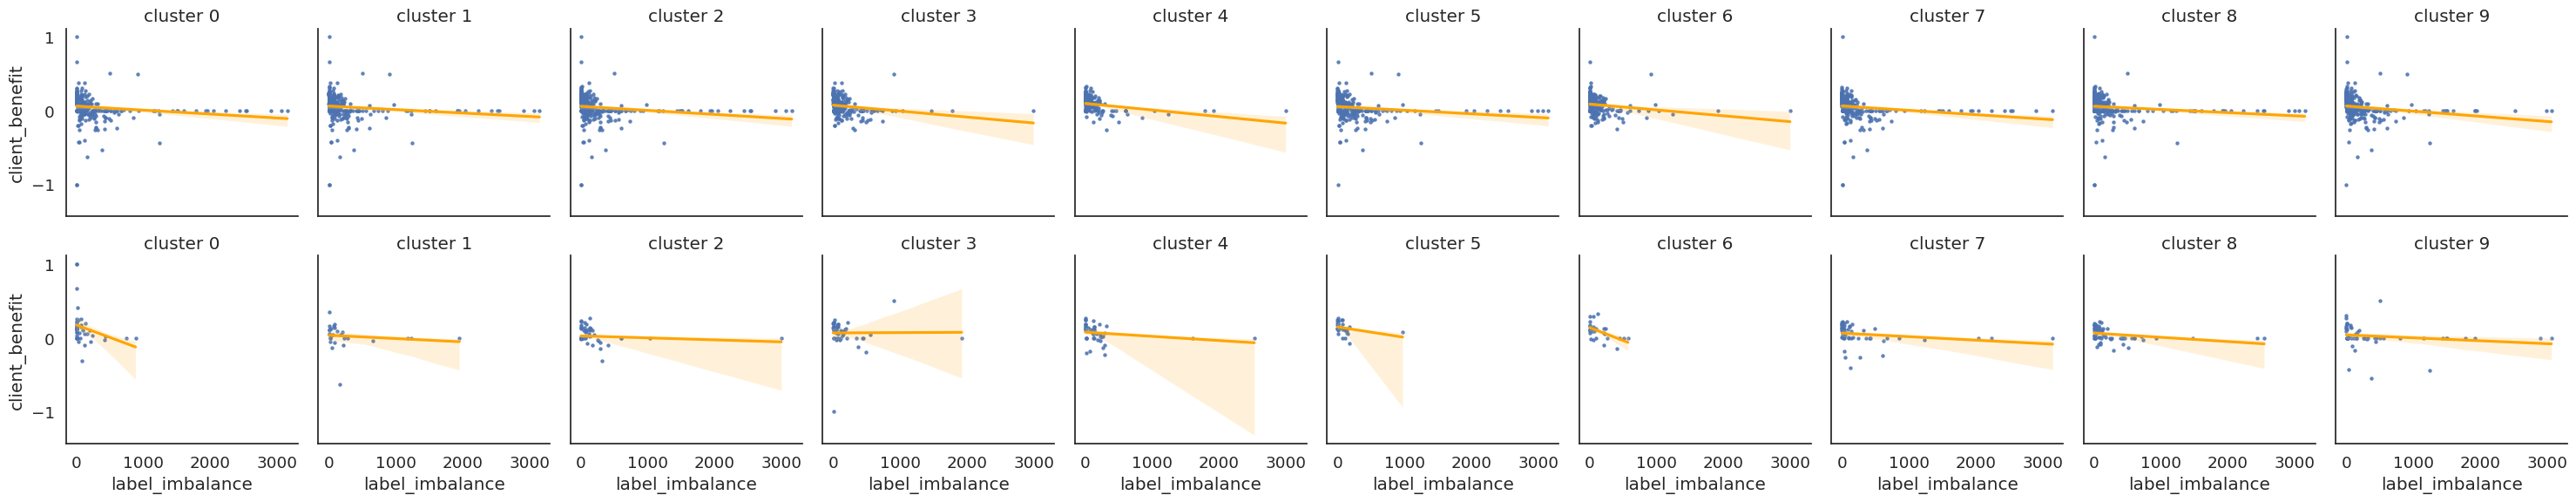

In [130]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10_clusters.png"))

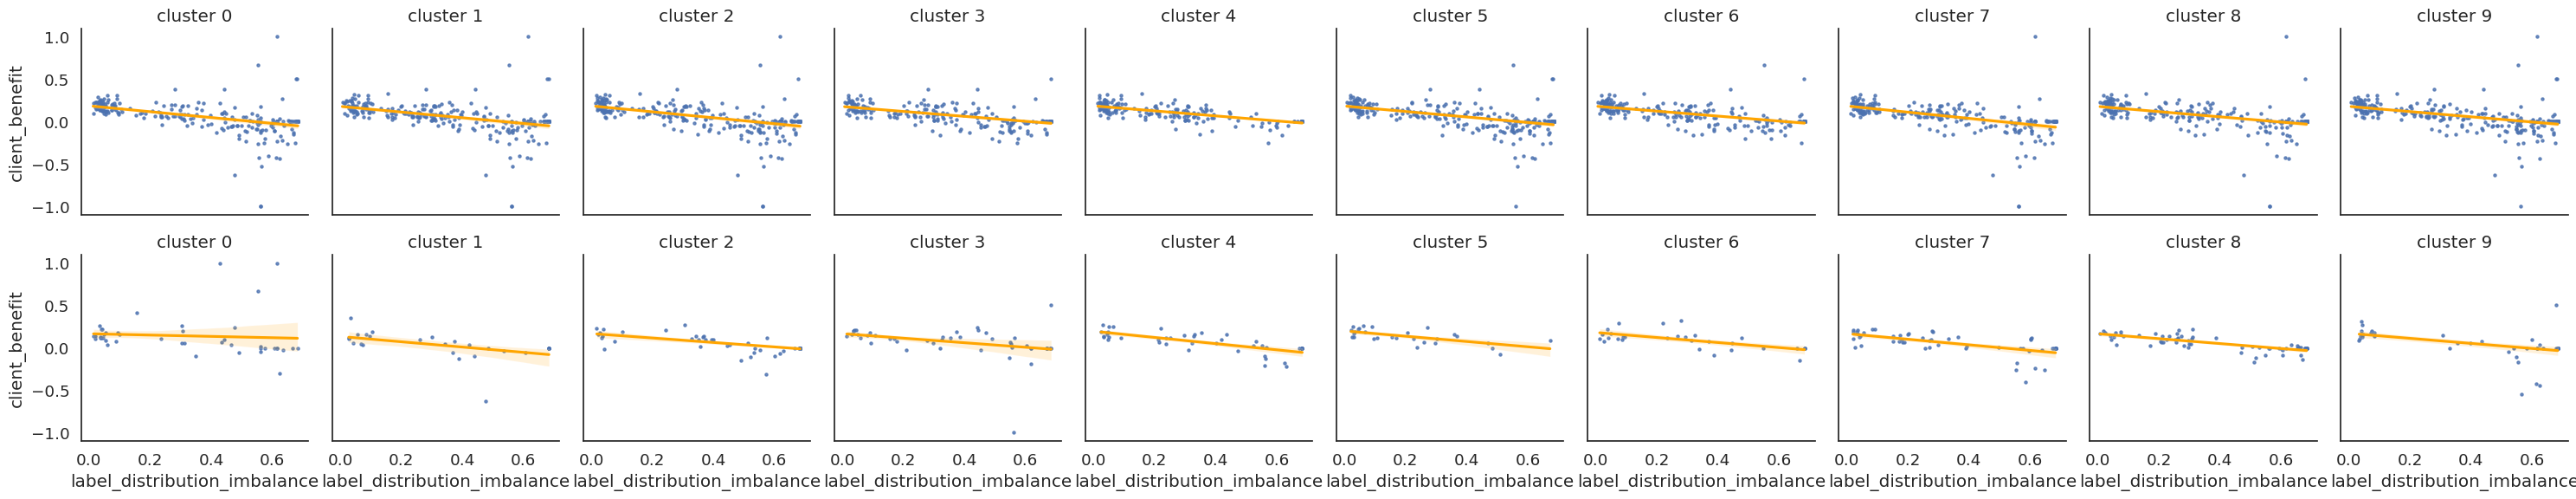

In [131]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10_clusters.png"))

### MNIST

In [132]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [133]:
benefits = compute_client_benefit(conn, data)

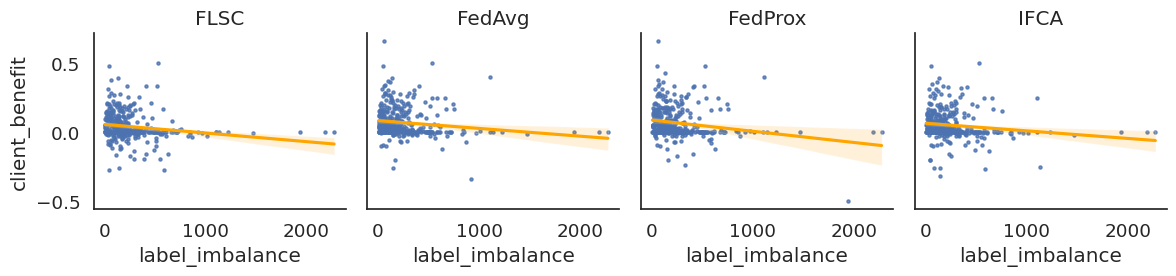

In [134]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10.png"))

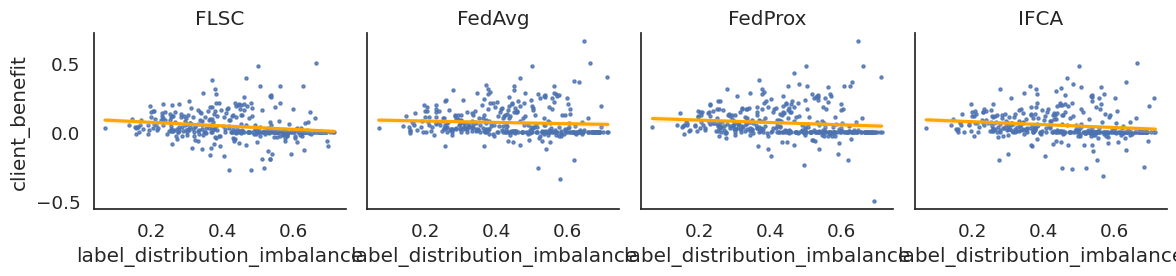

In [135]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist.png"))

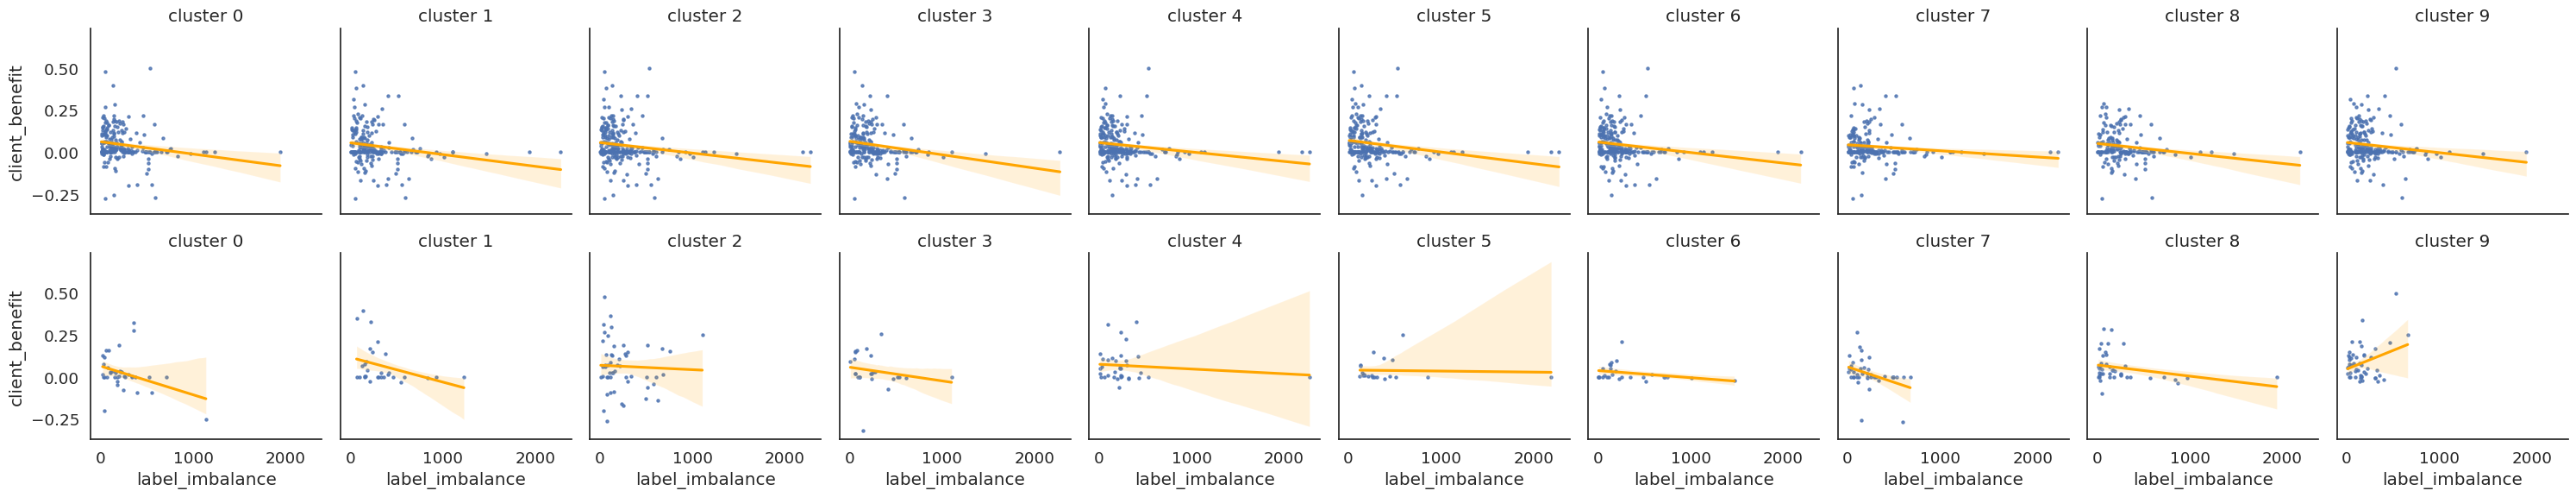

In [136]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_mnist_clusters.png"))

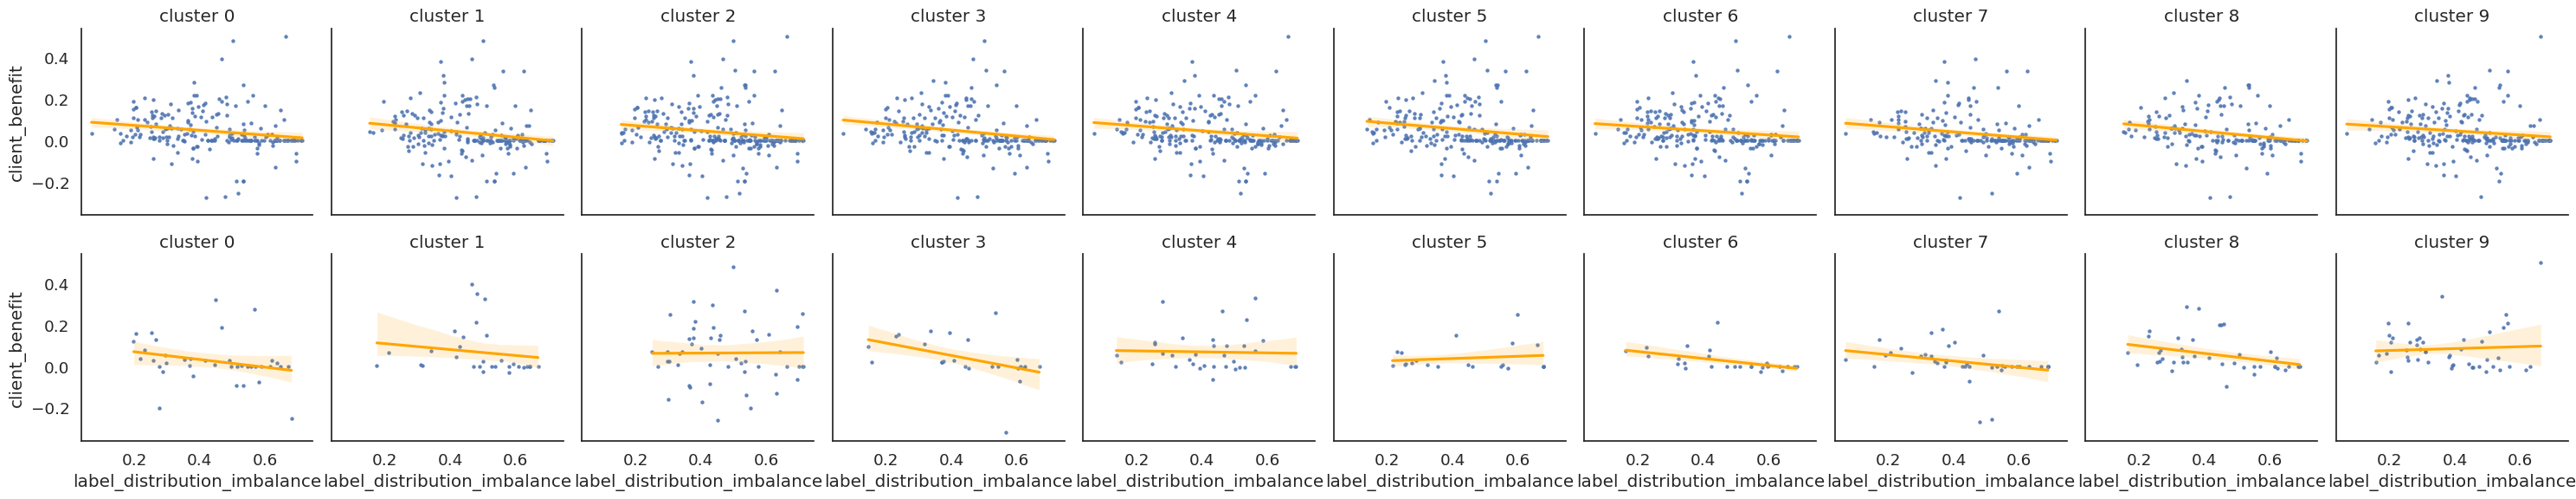

In [137]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist_clusters.png"))

## Feature (Distribution) Imbalance

### CIFAR-10

In [138]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [139]:
benefits = compute_client_benefit(conn, data)

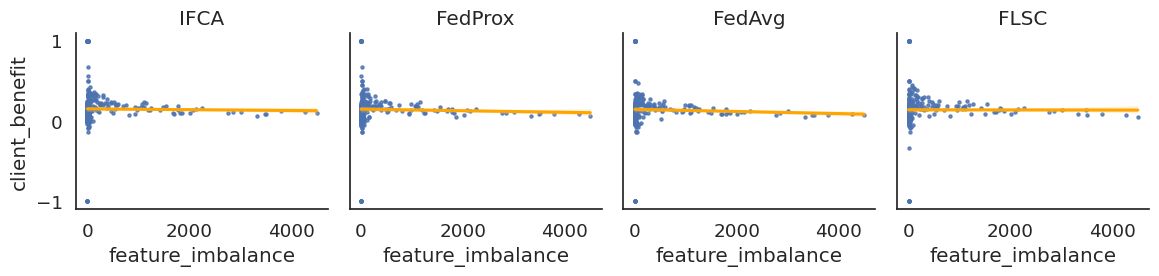

In [140]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10.png"))

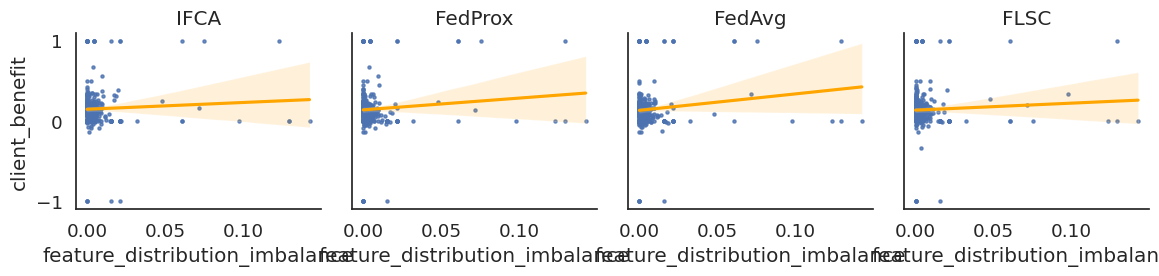

In [141]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist.png"))

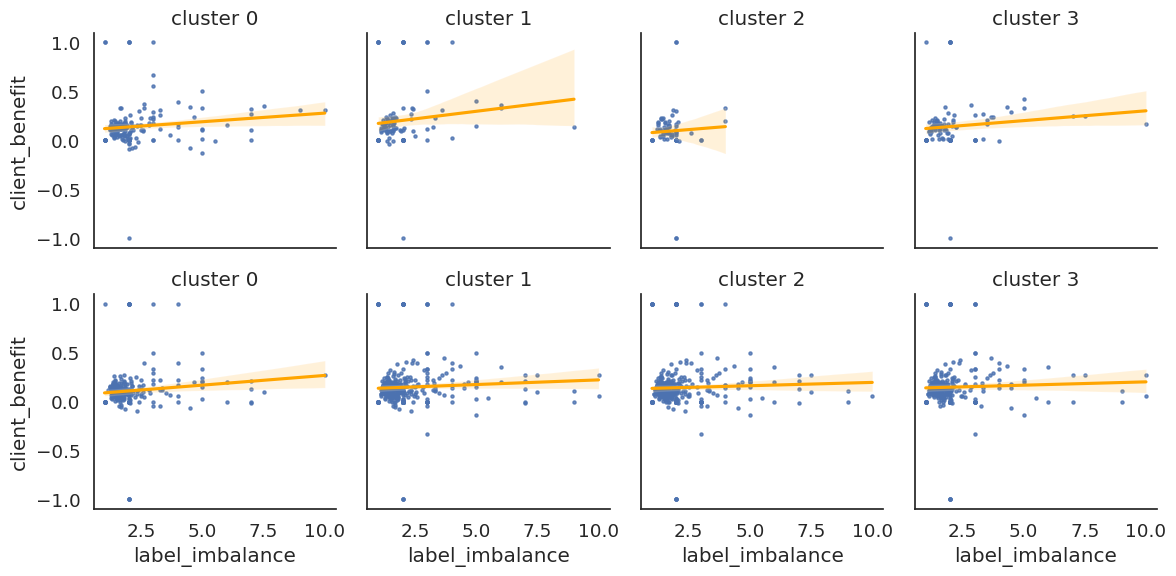

In [142]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_cifar10_clusters.png"))

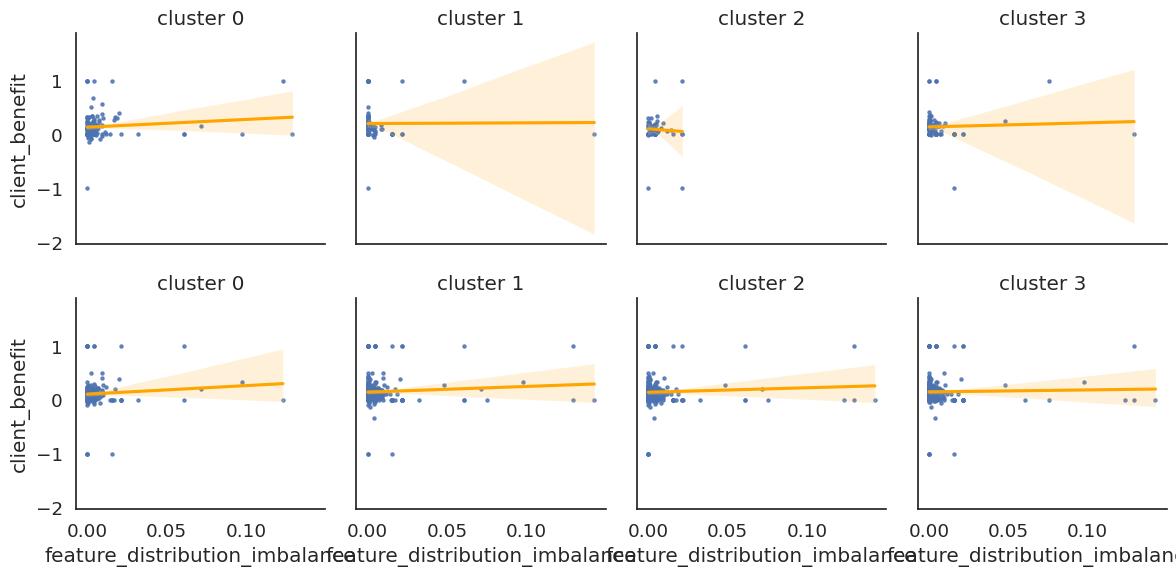

In [143]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters.png"))

### MNIST

In [144]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [145]:
benefits = compute_client_benefit(conn, data)

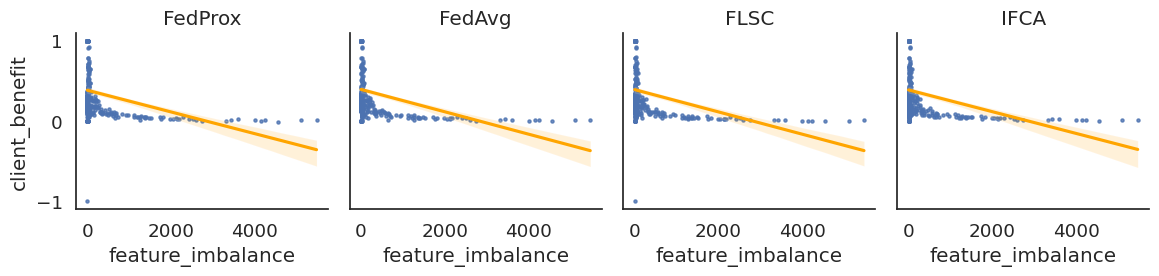

In [146]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_cifar10.png"))

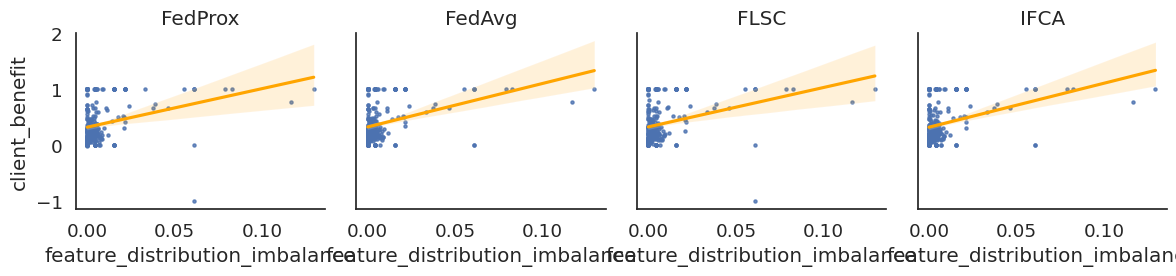

In [147]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist.png"))

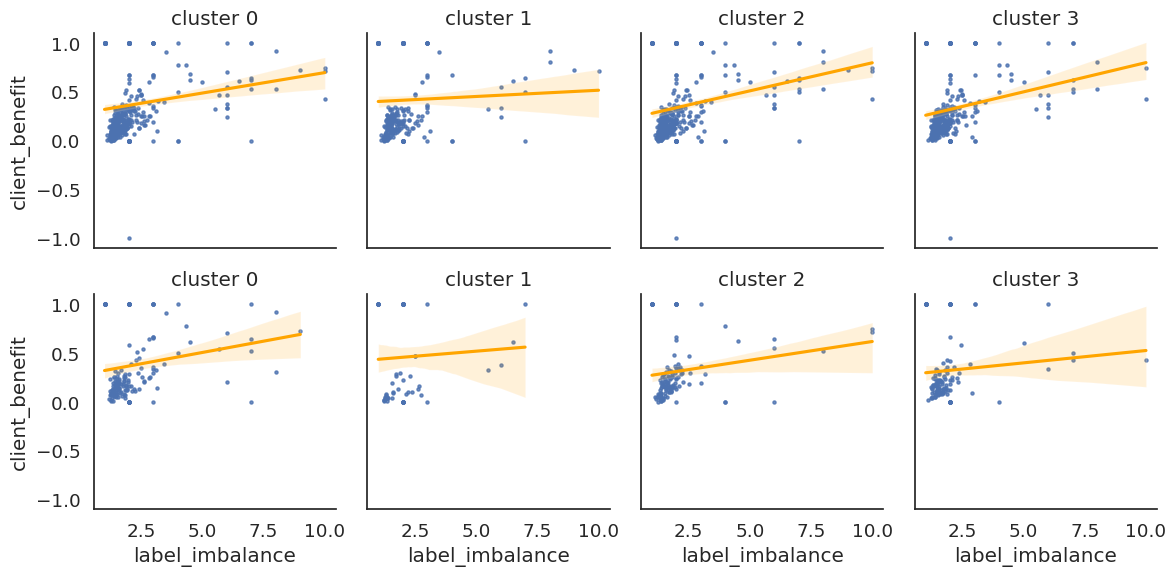

In [148]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_mnist_clusters.png"))

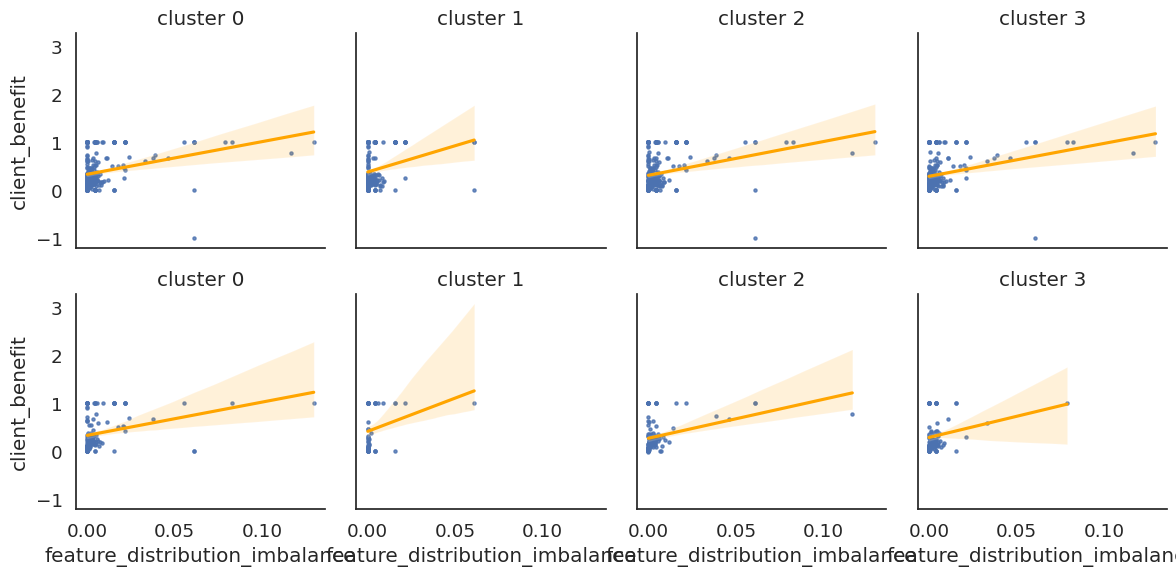

In [149]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters.png"))

# Client Contribution